In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set(style="darkgrid")
from time import time

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
# Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA    

# Pretty display for notebooks
%matplotlib inline

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%pylab inline
from random import *
from subprocess import check_output
def synthetic_svm(X,Y):
    #Split data into training and test datasets (training will be based on 70% of data)
    from sklearn.model_selection import train_test_split
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0,shuffle=True) 
    #test_size: if integer, number of examples into test dataset; if between 0.0 and 1.0, means proportion
    print('There are {} samples in the training set and {} samples in the test set'.format(X_train.shape[0], X_test.shape[0]))

    
    #Scaling data
    #from sklearn.preprocessing import StandardScaler
    
    from sklearn.model_selection import cross_val_score

    #sc = StandardScaler(with_mean=False)
    
    
    #sc.fit(X_train)
    #X_train_std = sc.transform(X_train)
    #X_test_std = sc.transform(X_test)

    #X_train_std and X_test_std are the scaled datasets to be used in algorithms
    #.1,.10
    #Applying SVC (Support Vector Classification)
    from sklearn.svm import SVC
    svm = SVC(kernel='rbf', random_state=0, gamma=.1, C=10.0,probability=True)
    
    print(Y_train.dtypes)
    Y_train=Y_train.astype('int')
    print(Y_train.dtypes)
    
    print(Y_test.dtypes)
    Y_test=Y_test.astype('int')
    print(Y_test.dtypes)
    
    
    svm.fit(X_train, Y_train)
    print('The accuracy of the SVM classifier on training data is {:.2f}'.format(svm.score(X_train, Y_train)))
    print('The accuracy of the SVM classifier on test data is {:.2f}'.format(svm.score(X_test, Y_test)))
    print('####Train prediction Label###############################################')
    Y_train_pred=svm.predict(X_train)
    
    
    
    #print(y_1)
    Y_test_pred=svm.predict(X_test)
    d=svm.decision_function(X_test)
    e=svm.predict_proba(X_test)
    print(e)
    print(d)
    
    
           

        
    
    return X_test,Y_test,Y_test_pred,e 
     



Populating the interactive namespace from numpy and matplotlib


/home/subham/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
#without accuracy ---> with cv
def main(datax, y_test, y_test_pred,e): 
        
    n=datax.shape[1]
    s=datax.shape[0]    
    data = np.zeros((s, n), dtype = int)
    
    r = np.zeros(n, dtype = int) 
    
    for i in range(n):
        if int(y_test.iloc[i])==1 :
            r[i]=1
        else :
            r[i]= -1  
    
    r2 = np.zeros(n, dtype = int) 
    for i in range(n):
        if int(y_test_pred[i])==1 :
            r2[i]=1
        else :
            r2[i]= -1          
    ar=[]
    
    for j in range(s):
        print("sensitive attribute ",(j+1)) 
        a=0
        b=0
        acc1=0
        acc2=0
        for i in range(n):
                data[j][i]= datax.iloc[j,i]
                if data[j][i]== 1 :
                    a=a+1
                    if r[i]==1:
                         acc1=acc1+1 

        print("ACTUAL----------total ,accepted, aceeptance rate:")             
        a1=float(acc1/a)
        print(a)
        
        print(acc1)
        print(a1)
        ar.append(a1)
        
    maxi= max(ar)
    mini= min(ar)
    DP=float(maxi-mini)
    print("data acceptance rates")
    print(ar)
    beta_act = []
    beta_act = ar
    print("data DP")
    print(DP)
    
    ar=[]
    
    for j in range(s):
        print("sensitive attribute ",(j+1)) 
        a=0
        b=0
        acc1=0
        acc2=0
        prec=0
        reca=0
        accur=0
        FP=0
        FN=0
        TP=0
        TN=0
        for i in range(n):
             if data[j][i]== 1 :
                    a=a+1
                    if r2[i]==1:
                        acc1=acc1+1 
                        if r[i]==1:
                            TP=TP+1
                        else:
                             FP=FP+1                
                    else:
                        if r[i]==1:
                            FN=FN+1
                        else:
                            TN=TN+1    
        
        print("prec reca accuracy for each sens") 
        prec= float(TP/(TP+FP))
        reca= float(TP/(TP+FN))
        accur= float((TP+TN)/a)
        print(prec,reca,accur)
        
        print("SVM----------total , accepted, aceeptance rate:")             
        
        a1=float(acc1/a)
        print(a)
        
        print(acc1)
        print(a1)
        ar.append(a1)
        
    maxi= max(ar)
    mini= min(ar)
    DP=float(maxi-mini)
    print("data acceptance rates")
    print(ar)
    print("data DP")
    print(DP) 
    
    print("SVM accuracy--------------------------")
    prec=0
    reca=0
    accur=0
    FP=0
    FN=0
    TP=0
    TN=0
    for i in range(n):
            if r2[i]==1:
                acc1=acc1+1 
                if r[i]==1:
                    TP=TP+1
                else:
                     FP=FP+1                
            else:
                if r[i]==1:
                     FN=FN+1
                else:
                     TN=TN+1    

        
    prec= float(TP/(TP+FP))
    reca= float(TP/(TP+FN))
    accur= float((TP+TN)/n)
    print(prec,reca,accur)
    
######################
    delta=1

    epsilon=[.01]
    beta_converge = [.5,.4]
    #beta_converge = [.15]
    alpha = [0,0.2,0.4,0.6,0.8,1]
    
    
    
    fi= np.zeros(n,dtype=int) 
    t=0
  
    #gamma = [0.175442,    0.142103, 0.166039,    0.164754,  0.153465,    0.14,  0.104348 ]
    for eps in epsilon:
        for beta_avg in beta_converge:
            print("----------------This is for covergence at beta = ",beta_avg, " ----------------")
            for a in alpha:
                # no weighting basic weighting 1
                u1,u2=min_max_lp_all_ng5(data,beta_act,eps,e,beta_avg,a)
                #######################Disp_impact#######################  
                print("alpha, beta_avg",a,beta_avg)
                accu_all=[]
                DP_all=[]
                precision_all=[]
                recall_all=[]
                ar_all=[]
                acceptance_rate=np.zeros((7,28),dtype=float)
                count=0
                print("<--------------------------------------->")
                t=t+1
                print("iteration t",t)
        #                 for alpha in np.arange(0,1.05,0.05):
        #                     print("alpha: ",alpha)
        #                     for i in range(n):

        #                         z=random()
        #                         if z < alpha:
        #                                fi[i]= u1[i] 

        #                         else:
        #                                fi[i]= r2[i]

                for i in range(n):
                     fi[i] = u1[i]


                for j in range(s):
                    print("sensitive attribute ",(j+1)) 

                    TP=0
                    FP=0
                    FN=0
                    TN=0
                    precision=0
                    recall=0
                    for i in range(n):
                         if data[j][i]== 1 :                        
                            if fi[i]==1 and r[i]==1:
                                TP=TP+1
                            if fi[i]==1 and r[i]==-1:
                                FP=FP+1 
                            if fi[i]==-1 and r[i]==1:
                                FN=FN+1
                            if fi[i]==-1 and r[i]==-1:
                                TN=TN+1    
                    if TP+FP !=0:
                        precision=float(TP/(TP+FP))
                    #print("precision",precision)
                    if TP+FN !=0:    
                        recall=float(TP/(TP+FN))
                   # print("recall",recall)

                    precision_all.append(precision)
                    recall_all.append(recall)
                    #print("TP,FP,TN,FN")
                    #print(TP,FP,TN,FN)

                    a=0
                    b=0
                    acc1=0
                    acc2=0
                    for i in range(n):
                            if data[j][i]== 1 :
                                a=a+1
                                if fi[i]==1:
                                     acc1=acc1+1 

        #                         print("total ,fair accepted, aceeptance rate:")             
                    a1=float(acc1/a)



        #                         print(a)
        #                         print(acc1)
        #                         print(a1)
                    ar_all.append(a1)

                count = count+1
                maxi=max(ar_all)
                mini= min(ar_all)
                DP=float(maxi-mini)
                print("individual acceptance rates")
                print(ar_all)
                print("individul precision")
                print(precision_all)
                print("individual recall")
                print(recall_all)
                print("DP all")
                print(DP)
                f_acc=0
                for i in range(n):
                     if fi[i] == r[i]:
                            f_acc=f_acc+1
                f_acc_l=float((f_acc*100)/n) 

        #######################################################################33   

        #                         print("sensitive attribute ",(j+1)) 





                TP=0
                FP=0
                FN=0
                TN=0
                precision=0
                recall=0
                accu=0
                for i in range(n):
                        if fi[i]==1 and r[i]==1:
                            TP=TP+1
                        if fi[i]==1 and r[i]==-1:
                            FP=FP+1 
                        if fi[i]==-1 and r[i]==1:
                            FN=FN+1
                        if fi[i]==-1 and r[i]==-1:
                            TN=TN+1    

                if TP+FP!=0:
                    precision=float(TP/(TP+FP))
                print("precision all",precision)
                if TP+FN!=0:
                    recall=float(TP/(TP+FN))


                print("recall all",recall)
                accu=float((TP+TN)/(TP+FN+TN+FP))


                print("accuracy all",accu)



                print("TP,FP,TN,FN")
                print(TP,FP,TN,FN)
        #                         print("total ,fair accepted, aceeptance rate:")             
                a1=float(acc1/a)
          

    print("<--------------------------------------->")
    alpha_weight=np.arange(0,1.05,.05)        
    return accu_all,DP_all,acceptance_rate,alpha_weight

In [4]:
#without accuracy ---> without cv
def main2(datax, y_test, y_test_pred,e): 
        
    n=datax.shape[1]
    s=datax.shape[0]    
    data = np.zeros((s, n), dtype = int)
    
    r = np.zeros(n, dtype = int) 
    
    for i in range(n):
        if int(y_test.iloc[i])==1 :
            r[i]=1
        else :
            r[i]= -1  
    
    r2 = np.zeros(n, dtype = int) 
    for i in range(n):
        if int(y_test_pred[i])==1 :
            r2[i]=1
        else :
            r2[i]= -1          
    ar=[]
    
    for j in range(s):
        print("sensitive attribute ",(j+1)) 
        a=0
        b=0
        acc1=0
        acc2=0
        for i in range(n):
                data[j][i]= datax.iloc[j,i]
                if data[j][i]== 1 :
                    a=a+1
                    if r[i]==1:
                         acc1=acc1+1 

        print("ACTUAL----------total ,accepted, aceeptance rate:")             
        a1=float(acc1/a)
        print(a)
        
        print(acc1)
        print(a1)
        ar.append(a1)
        
    maxi= max(ar)
    mini= min(ar)
    DP=float(maxi-mini)
    print("data acceptance rates")
    print(ar)
    beta_act = []
    beta_act = [0.5229226361031518, 0.5017626321974148, 0.7256857855361596, 0.28905597326649957, 0.4561891515994437, 0.5300416418798334, 0.5399416909620991, 0.42773722627737226, 0.3055555555555556, 0.7062706270627063, 0.4864864864864865, 0.514933628318584, 0.5434131736526946, 0.4942263279445728, 0.2857142857142857, 0.7140562248995984, 0.2900964066608238, 0.7053216838760922, 0.5892053973013494, 0.4766301211771495]
    print("data DP")
    print(DP)
    
    ar=[]
    
    for j in range(s):
        print("sensitive attribute ",(j+1)) 
        a=0
        b=0
        acc1=0
        acc2=0
        prec=0
        reca=0
        accur=0
        FP=0
        FN=0
        TP=0
        TN=0
        for i in range(n):
             if data[j][i]== 1 :
                    a=a+1
                    if r2[i]==1:
                        acc1=acc1+1 
                        if r[i]==1:
                            TP=TP+1
                        else:
                             FP=FP+1                
                    else:
                        if r[i]==1:
                            FN=FN+1
                        else:
                            TN=TN+1    
        
        print("prec reca accuracy for each sens") 
        prec= float(TP/(TP+FP))
        reca= float(TP/(TP+FN))
        accur= float((TP+TN)/a)
        print(prec,reca,accur)
        
        print("SVM----------total , accepted, aceeptance rate:")             
        
        a1=float(acc1/a)
        print(a)
        
        print(acc1)
        print(a1)
        ar.append(a1)
        
    maxi= max(ar)
    mini= min(ar)
    DP=float(maxi-mini)
    print("data acceptance rates")
    print(ar)
    print("data DP")
    print(DP) 
    
    print("SVM accuracy--------------------------")
    prec=0
    reca=0
    accur=0
    FP=0
    FN=0
    TP=0
    TN=0
    for i in range(n):
            if r2[i]==1:
                acc1=acc1+1 
                if r[i]==1:
                    TP=TP+1
                else:
                     FP=FP+1                
            else:
                if r[i]==1:
                     FN=FN+1
                else:
                     TN=TN+1    

        
    prec= float(TP/(TP+FP))
    reca= float(TP/(TP+FN))
    accur= float((TP+TN)/n)
    print(prec,reca,accur)
    
######################
    delta=1

    epsilon=[.01]
    beta_converge = [.5,.4]
    #beta_converge = [.15]
    alpha = [0,0.2,0.4,0.6,0.8,1]
    
    
    
    fi= np.zeros(n,dtype=int) 
    t=0
  
    #gamma = [0.175442,    0.142103, 0.166039,    0.164754,  0.153465,    0.14,  0.104348 ]
    for eps in epsilon:
        for beta_avg in beta_converge:
            print("----------------This is for covergence at beta = ",beta_avg, " ----------------")
            #for a in alpha:
            # no weighting basic weighting 1
            u1,u2=min_max_lp_all_ng6(data,beta_act,eps,e,beta_avg,a)
            #######################Disp_impact#######################  
            print(" beta_avg",beta_avg)
            accu_all=[]
            DP_all=[]
            precision_all=[]
            recall_all=[]
            ar_all=[]
            acceptance_rate=np.zeros((7,28),dtype=float)
            count=0
            print("<--------------------------------------->")
            t=t+1
            print("iteration t",t)
    #                 for alpha in np.arange(0,1.05,0.05):
    #                     print("alpha: ",alpha)
    #                     for i in range(n):

    #                         z=random()
    #                         if z < alpha:
    #                                fi[i]= u1[i] 

    #                         else:
    #                                fi[i]= r2[i]

            for i in range(n):
                 fi[i] = u1[i]


            for j in range(s):
                print("sensitive attribute ",(j+1)) 

                TP=0
                FP=0
                FN=0
                TN=0
                precision=0
                recall=0
                for i in range(n):
                     if data[j][i]== 1 :                        
                        if fi[i]==1 and r[i]==1:
                            TP=TP+1
                        if fi[i]==1 and r[i]==-1:
                            FP=FP+1 
                        if fi[i]==-1 and r[i]==1:
                            FN=FN+1
                        if fi[i]==-1 and r[i]==-1:
                            TN=TN+1    
                if TP+FP !=0:
                    precision=float(TP/(TP+FP))
                #print("precision",precision)
                if TP+FN !=0:    
                    recall=float(TP/(TP+FN))
               # print("recall",recall)

                precision_all.append(precision)
                recall_all.append(recall)
                #print("TP,FP,TN,FN")
                #print(TP,FP,TN,FN)

                a=0
                b=0
                acc1=0
                acc2=0
                for i in range(n):
                        if data[j][i]== 1 :
                            a=a+1
                            if fi[i]==1:
                                 acc1=acc1+1 

    #                         print("total ,fair accepted, aceeptance rate:")             
                a1=float(acc1/a)



    #                         print(a)
    #                         print(acc1)
    #                         print(a1)
                ar_all.append(a1)

            count = count+1
            maxi=max(ar_all)
            mini= min(ar_all)
            DP=float(maxi-mini)
            print("individual acceptance rates")
            print(ar_all)
            print("individul precision")
            print(precision_all)
            print("individual recall")
            print(recall_all)
            print("DP all")
            print(DP)
            f_acc=0
            for i in range(n):
                 if fi[i] == r[i]:
                        f_acc=f_acc+1
            f_acc_l=float((f_acc*100)/n) 

    #######################################################################33   

    #                         print("sensitive attribute ",(j+1)) 





            TP=0
            FP=0
            FN=0
            TN=0
            precision=0
            recall=0
            accu=0
            for i in range(n):
                    if fi[i]==1 and r[i]==1:
                        TP=TP+1
                    if fi[i]==1 and r[i]==-1:
                        FP=FP+1 
                    if fi[i]==-1 and r[i]==1:
                        FN=FN+1
                    if fi[i]==-1 and r[i]==-1:
                        TN=TN+1    

            if TP+FP!=0:
                precision=float(TP/(TP+FP))
            print("precision all",precision)
            if TP+FN!=0:
                recall=float(TP/(TP+FN))


            print("recall all",recall)
            accu=float((TP+TN)/(TP+FN+TN+FP))


            print("accuracy all",accu)



            print("TP,FP,TN,FN")
            print(TP,FP,TN,FN)
    #                         print("total ,fair accepted, aceeptance rate:")             
            a1=float(acc1/a)


    print("<--------------------------------------->")
    alpha_weight=np.arange(0,1.05,.05)        
    return accu_all,DP_all,acceptance_rate,alpha_weight

In [5]:
# #without accuracy ---> 2
# def main1(datax, y_test, y_test_pred): 
        
#     n=datax.shape[1]
#     s=datax.shape[0]    
#     data = np.zeros((s, n), dtype = int)
    
#     r = np.zeros(n, dtype = int) 
    
#     for i in range(n):
#         if int(y_test.iloc[i])==1 :
#             r[i]=1
#         else :
#             r[i]= -1  
    
#     r2 = np.zeros(n, dtype = int) 
#     for i in range(n):
#         if int(y_test_pred[i])==1 :
#             r2[i]=1
#         else :
#             r2[i]= -1          
#     ar=[]
    
#     for j in range(s):
#         print("sensitive attribute ",(j+1)) 
#         a=0
#         b=0
#         acc1=0
#         acc2=0
#         for i in range(n):
#                 data[j][i]= datax.iloc[j,i]
#                 if data[j][i]== 1 :
#                     a=a+1
#                     if r[i]==1:
#                          acc1=acc1+1 

#         print("ACTUAL----------total ,accepted, aceeptance rate:")             
#         a1=float(acc1/a)
#         print(a)
        
#         print(acc1)
#         print(a1)
#         ar.append(a1)
        
#     maxi= max(ar)
#     mini= min(ar)
#     DP=float(maxi-mini)
#     print("data acceptance rates")
#     print(ar)
#     print("data DP")
#     print(DP)
    
#     ar=[]
    
#     for j in range(s):
#         print("sensitive attribute ",(j+1)) 
#         a=0
#         b=0
#         acc1=0
#         acc2=0
#         prec=0
#         reca=0
#         accur=0
#         FP=0
#         FN=0
#         TP=0
#         TN=0
#         for i in range(n):
#              if data[j][i]== 1 :
#                     a=a+1
#                     if r2[i]==1:
#                         acc1=acc1+1 
#                         if r[i]==1:
#                             TP=TP+1
#                         else:
#                              FP=FP+1                
#                     else:
#                         if r[i]==1:
#                             FN=FN+1
#                         else:
#                             TN=TN+1    
        
#         print("prec reca accuracy for each sens") 
#         prec= float(TP/(TP+FP))
#         reca= float(TP/(TP+FN))
#         accur= float((TP+TN)/a)
#         print(prec,reca,accur)
        
#         print("SVM----------total , accepted, aceeptance rate:")             
        
#         a1=float(acc1/a)
#         print(a)
        
#         print(acc1)
#         print(a1)
#         ar.append(a1)
        
#     maxi= max(ar)
#     mini= min(ar)
#     DP=float(maxi-mini)
#     print("data acceptance rates")
#     print(ar)
#     print("data DP")
#     print(DP) 
    
#     print("SVM accuracy--------------------------")
#     prec=0
#     reca=0
#     accur=0
#     FP=0
#     FN=0
#     TP=0
#     TN=0
#     for i in range(n):
#             if r2[i]==1:
#                 acc1=acc1+1 
#                 if r[i]==1:
#                     TP=TP+1
#                 else:
#                      FP=FP+1                
#             else:
#                 if r[i]==1:
#                      FN=FN+1
#                 else:
#                      TN=TN+1    

        
#     prec= float(TP/(TP+FP))
#     reca= float(TP/(TP+FN))
#     accur= float((TP+TN)/n)
#     print(prec,reca,accur)
#     print("precision recall accuracy")
    
# #     delta1=[.70,.75,.80,.85,.90,.95]
#     #gamma=.05,.06,.07
#     #delta1=[.80,.85,.90,.95]
# # (for reproducibility)  

# # delta1=[.8], gama=[.1], epsilon=[.05]  
# # delta1=[.8], gama=[.15], epsilon=[.01]
 
# #     delta1=np.arange(1,.79,-.01)

#     delta=1
# #     gama=[.1572]
# #     epsilon=[.0090]
#     epsilon=[.02,.04,.10,.15,.20,.30,.40,.50,.60]
#     gama=[.35]
    
# #     epsilon=[.02,.04,.10,.15,.20,.30,.40,.50,.60]
# #     gama=[.30,.40,.50,.60,.70]
# #     epsilon=[.0090]
#     fi= np.zeros(n,dtype=int) 
# #     for delta in delta1:
#     for gamma in gama:
#         for eps in epsilon:
#             u1,u2=min_max_lp_all_ng5(data,gamma,eps,r2,delta) (data1,beta,eps,e,beta_avg,alpha):
#             #######################Disp_impact#######################  
#             print("gamma-epsilon-delta",gamma,eps,delta)
#             accu_all=[]
#             DP_all=[]
#             precision_all=[]
#             recall_all=[]
#             acceptance_rate=np.zeros((7,28),dtype=float)
#             count=0
# #                 for alpha in np.arange(0,1.05,0.05):
# #                     print("alpha: ",alpha)
# #                     for i in range(n):

# #                         z=random()
# #                         if z < alpha:
# #                                fi[i]= u1[i] 

# #                         else:
# #                                fi[i]= r2[i]

#             for i in range(n):
#                  fi[i] = u1[i]
#             ar=[]

#             print("################################")
            
#             for j in range(s):
#                 print("sensitive attribute ",(j+1)) 
#                 a=0
#                 b=0
#                 acc1=0
#                 acc2=0
#                 prec=0
#                 reca=0
#                 accur=0
#                 FP=0
#                 FN=0
#                 TP=0
#                 TN=0
#                 for i in range(n):
#                      if data[j][i]== 1 :
#                             a=a+1
#                             if fi[i]==1:
#                                 acc1=acc1+1 
#                                 if r[i]==1:
#                                     TP=TP+1
#                                 else:
#                                      FP=FP+1                
#                             else:
#                                 if r[i]==1:
#                                     FN=FN+1
#                                 else:
#                                     TN=TN+1    

#                 print("lp ############### prec reca accuracy for each sens") 
#                 prec= float(TP/(TP+FP))
#                 reca= float(TP/(TP+FN))
#                 accur= float((TP+TN)/a)
#                 print(prec,reca,accur)

#                 print("By lp---------total , accepted, aceeptance rate:")             

#                 a1=float(acc1/a)
#                 print(a,acc1,a1)
#                 ar.append(a1)


#             maxi= max(ar)
#             mini= min(ar)
#             DP=float(maxi-mini)
#             print("data acceptance rates")
#             print(ar)
#             print("data DP")
#             print(DP) 
#             TP=0
#             FP=0
#             FN=0
#             TN=0
#             accurr=0
#             precision=0
#             recall=0
#             for i in range(n):
#                     if fi[i]==1 and r[i]==1:
#                         TP=TP+1
#                     if fi[i]==-1 and r[i]==-1:
#                         TN=TN+1     
#                     if fi[i]==1 and r[i]==-1:
#                         FP=FP+1 
#                     if fi[i]==-1 and r[i]==1:
#                         FN=FN+1
#             print("total accepted ")            
#             precision=float(TP/(TP+FP))
#             print("finalprecision",precision)
#             recall=float(TP/(TP+FN))
#             print("finalrecall",recall)
#             accurr=float((TP+TN)/(TP+TN+FP+FN))
#             print("finalaccuracy",accurr)
        
        
        
        
        
        
      
#     alpha_weight=np.arange(0,1.05,.05)        
#     return accu_all,DP_all,acceptance_rate,alpha_weight

In [6]:
#basic weighting 1



####################3LP5#######################3



#accu_all,DP_all,acceptance_rate,alpha_weight = main(sensitive, Y_test, Y_test_pred,e)
#agar2
# bilal - am_ind asian black other white female male(actual precision sequence)
# 6         5          4          2                1              0                  3

# ours -s_male, s_female  r_white, r_black, r_asian-pac-islander','r_amer-indian-eskimo','r_other
           
# beta=[6         5          4          2                1              0                  3]

# beta=[beta[6], beta[5],beta[4],beta[2],beta[1],beta[0],beta[3]]


#bilal -female male  am_ind asian  black other white (actual acceptance rate sequence)
#          0      1     2       3     4      5    6   
# ours -s_male, s_female  r_white, r_black, r_asian-pac-islander','r_amer-indian-eskimo', 'r_other
           
# beta=[1       0        6          4            3                   2                    5]


#NG
import time
import pulp as p 
def min_max_lp_all_ng5(data1,beta_act,eps,e,beta_avg,alpha):
    import pulp as p 
    import math
    
    
    m=data1.shape[0]
    n=data1.shape[1]
    print('dimension of data')
    print(m,n)
    
    ################ sorted result
    h = [[] for i in range(m)]
    key = [[] for i in range(m)]

    h1=[]
    h2=[]
    h3=[]
    h4=[]
    h5=[]
    h6=[]
    h7=[]
    key1=[]
    key2=[]
    key3=[]
    key4=[]
    key5=[]
    key6=[]
    key7=[]
    cost=np.zeros(n,dtype=int)
    data2=np.zeros((m,n),dtype=int)
    for i in range(n):
        for j in range(m):
            if data1[j][i]==1:           
                h[j].append(e[i][1])
                key[j].append(i)

            
    '''    
        elif data1[1][i]==1:
            h2.append(e[i][1])
            key2.append(i)
            
        elif data1[2][i]==1:
            h3.append(e[i][1])
            key3.append(i)
            
        elif data1[3][i]==1:
            h4.append(e[i][1])
            key4.append(i)
        elif data1[4][i]==1:
            h5.append(e[i][1])
            key5.append(i)
        elif data1[5][i]==1:
            h6.append(e[i][1])
            key6.append(i)
        elif data1[6][i]==1:
            h7.append(e[i][1])
            key7.append(i)
      '''      
#print(hc)
#     print(key1)
    for k in range(m):
        for i in range(1,len(h[k])):
            for j in range(i,0,-1):
                var=0
                var2=0
                if h[k][j-1]<h[k][j]:
                    index=j
                    var=h[k][j]
                    h[k][j]=h[k][j-1]
                    h[k][j-1]=var
                    var2=key[k][j]
                    key[k][j]=key[k][j-1]
                    key[k][j-1]=var2
                else:
                    break

    '''
    for i in range(1,len(h2)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h2[j-1]<h2[j]:
                index=j
                var=h2[j]
                h2[j]=h2[j-1]
                h2[j-1]=var

                var2=key2[j]
                key2[j]=key2[j-1]
                key2[j-1]=var2
            else:
                break
    for i in range(1,len(h3)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h3[j-1]<h3[j]:
                index=j
                var=h3[j]
                h3[j]=h3[j-1]
                h3[j-1]=var

                var2=key3[j]
                key3[j]=key3[j-1]
                key3[j-1]=var2
            else:
                break
    for i in range(1,len(h4)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h4[j-1]<h4[j]:
                index=j
                var=h4[j]
                h4[j]=h4[j-1]
                h4[j-1]=var

                var2=key4[j]
                key4[j]=key4[j-1]
                key4[j-1]=var2
            else:
                break
    for i in range(1,len(h5)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h3[j-1]<h5[j]:
                index=j
                var=h5[j]
                h5[j]=h5[j-1]
                h5[j-1]=var

                var2=key5[j]
                key5[j]=key5[j-1]
                key5[j-1]=var2
            else:
                break
                
                
                
    for i in range(1,len(h6)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h6[j-1]<h6[j]:
                index=j
                var=h6[j]
                h6[j]=h6[j-1]
                h6[j-1]=var

                var2=key6[j]
                key6[j]=key6[j-1]
                key6[j-1]=var2
            else:
                break        
                

    for i in range(1,len(h7)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h7[j-1]<h7[j]:
                index=j
                var=h7[j]
                h7[j]=h7[j-1]
                h7[j-1]=var

                var2=key7[j]
                key7[j]=key7[j-1]
                key7[j-1]=var2
            else:
                break 
              
    for i in range(m):
        for j in range(len(key[i])):    
            data2[i][key[i][j]]=j+1                
    for j in range(len(key2)):
         data2[1][key2[j]]=j+1
    for j in range(len(key3)):
         data2[2][key3[j]]=j+1
    for j in range(len(key4)):
         data2[3][key4[j]]=j+1 
    for j in range(len(key5)):
         data2[4][key5[j]]=j+1
    for j in range(len(key6)):
         data2[5][key6[j]]=j+1   
    for j in range(len(key7)):
         data2[6][key7[j]]=j+1
    
    
    '''            
    for i in range(m):
        for j in range(len(key1)):    
            if h[i][j]==h[i][j-1] and j>=1:
                data2[i][key1[j]]=data2[i][key1[j-1]]
            else:    
                data2[i][key1[j]]=j+1
     
    '''
    for j in range(len(key2)):
        if h2[j]==h2[j-1] and j>=1:
            data2[1][key2[j]]=data2[0][key2[j-1]]
        else:    
            data2[1][key2[j]]=j+1
    for j in range(len(key3)):
        if h3[j]==h3[j-1] and j>=1:
            data2[2][key3[j]]=data2[2][key3[j-1]]
        else:    
            data2[2][key3[j]]=j+1
    for j in range(len(key4)):
        if h4[j]==h4[j-1] and j>=1:
            data2[3][key4[j]]=data2[3][key4[j-1]]
        else:    
            data2[3][key4[j]]=j+1
    for j in range(len(key5)):
        if h5[j]==h5[j-1] and j>=1:
            data2[4][key5[j]]=data2[4][key5[j-1]]
        else:    
            data2[4][key5[j]]=j+1
    for j in range(len(key6)):
        if h6[j]==h6[j-1] and j>=1:
            data2[5][key6[j]]=data2[5][key6[j-1]]
        else:    
            data2[5][key6[j]]=j+1
    for j in range(len(key7)):
        if h7[j]==h7[j-1] and j>=1:
            data2[6][key7[j]]=data2[6][key7[j-1]]
        else:    
            data2[6][key7[j]]=j+1 
    '''
    
    alpha2=[1,1,1,1,1,1,1]
    
    '''
    for j in range(len(key1)):    
        #data2[0][key1[j]]=((j+1)/((beta[0]*len(key1))*((beta[0]*len(key1))+1)/2)*alpha[0])
         
        data2[0][key1[j]]=(j+1)*alpha2[0]
    for j in range(len(key2)):
        data2[1][key2[j]]=(j+1)*alpha2[1]
    for j in range(len(key3)):
        if data1[2][key3[j]]==1 and data1[0][key3[j]]==1: 
            data2[2][key3[j]]=(j+1)*(len(key1)/len(key3))*alpha2[2]
        else:
            data2[2][key3[j]]=(j+1)*(len(key2)/len(key3))*alpha2[2]                  
        
    for j in range(len(key4)):
        if data1[3][key4[j]]==1 and data1[0][key4[j]]==1:                   
            data2[3][key4[j]]=(j+1)*(len(key1)/len(key4))*alpha2[3]
        else :                     
            data2[3][key4[j]]=(j+1)*(len(key2)/len(key4))*alpha2[3]
                             
    for j in range(len(key5)):
        if data1[4][key5[j]]==1 and data1[0][key5[j]]==1:                  
            data2[4][key5[j]]=(j+1)*(len(key1)/len(key5))*alpha2[4]
        else:      
            data2[4][key5[j]]=(j+1)*(len(key2)/len(key5))*alpha2[4]
    for j in range(len(key6)):
        if data1[5][key6[j]]==1 and data1[0][key6[j]]==1:                    
            data2[5][key6[j]]=(j+1)*(len(key1)/len(key6))*alpha2[5]
        else:                    
             data2[5][key6[j]]=(j+1)*(len(key2)/len(key6))*alpha2[5]
    for j in range(len(key7)):
        if data1[5][key7[j]]==1 and data1[0][key7[j]]==1:                    
            data2[5][key7[j]]=(j+1)*(len(key1)/len(key7))*alpha2[5]
        else:                    
             data2[5][key7[j]]=(j+1)*(len(key2)/len(key7))*alpha2[5]            
    '''            
    
    for j in range(n):
        summ=0
        for i in range(m):
       
            summ=summ+data2[i][j] 
        cost[j]=summ
        
        
    ################
    
    
    Lp_prob = p.LpProblem('Problem', p.LpMinimize)  
   
    
#     X=np.zeros(n+1,dtype=p.LpVariable)
    X=np.zeros(n+m+1,dtype=p.LpVariable)
    Y=np.zeros(m,dtype=p.LpVariable)
    
    sizes=np.zeros(m,dtype=int)
    w=np.zeros(m,dtype=int)
#     report_index(index,data1,e):  
    max_size_index = 0
    max_size=0
    for i in range(m):
        count=0
        for j in range(n):
            if data1[i][j]==1:
                count=count+1        
        if count>max_size:
            max_size=count
            max_size_index = i
        sizes[i]=count
    print(sizes)    
    #############################33
    
    
    
    
    ###############################
    
   
    beta_actual = beta_act
    #beta_actual = [0.5229226361031518, 0.49236192714453586, 0.7256857855361596, 0.2756892230576441, 0.4561891515994437, 0.520523497917906, 0.5311953352769679, 0.42627737226277373, 0.3021885521885522, 0.6963696369636964]
        
    
    
    select_sizes=np.zeros(m,dtype=int)
   
    size_final=np.zeros(m,dtype=int)

    for i in range(m):
        var1 = str(n+100+i)
        Y[i]=p.LpVariable(var1,lowBound=0,upBound=1,cat='Continuous')
    
    for i in range(n):
        var1=str(i)       
        X[i]=p.LpVariable(var1,lowBound=0,upBound=1,cat='Integer')
   
    X[n]=p.LpVariable(str(n),lowBound=0,upBound=1,cat='Continuous')  
#     for i in range(m):
#         k=n+i+1
#         var1=str(k)     
#         alpha=(((sizes[i])*(sizes[i]+1))/2)
#         X[i]=p.LpVariable(var1,lowBound=(((beta*sizes[i])*(beta*sizes[i]+1))/2),upBound=alpha,cat='Continuous')
    
        
#     X[n]=  p.LpVariable("z1",lowBound=0)
    #X[n+1]=  p.LpVariable("z2",lowBound=0)
  

    #########objective function#####################
    
#     Lp_prob += 2*X[n+1]+10*X[n+2]+9*X[n+3]+3*X[n+4]
    #alpha=0.8
    #beta_avg = 0.10
    for i in range(m):
        w[i] = (sizes[max_size_index]/sizes[i])
            
        
    
    
    Lp_prob+= p.lpSum([(X[j])*(p.lpSum([w[i]*data2[i][j] for i in range(m)])) for j in range(n)])  #sum(Z[j]*(sum(W[i]*data2[i][j] for i in range(m))) for j in range(n))
    #Lp_prob+=1  
    
    #Lp_prob += Y[0]*sizes[0] + Y[1]*sizes[1] >= p.lpSum([Y[j]*sizes[j] for j in np.arange(2,6)])
    #Lp_prob += Y[0]*sizes[0] + Y[1]*sizes[1] <= p.lpSum([Y[j]*sizes[j] for j in np.arange(2,6)])
    ##############constraint#################
    for i in range(2*m):
        if i<m:

            Lp_prob += p.lpSum([(X[j])*(data1[i][j]) for j in range(n)]) >= Y[i]*sizes[i]
            Lp_prob += p.lpSum([(X[j])*(data1[i][j]) for j in range(n)]) <= (Y[i]+eps)*sizes[i]
    
    
    for i in range(m):
        if beta_actual[i] >= beta_avg:
            Lp_prob += Y[i] >= (1-alpha)*beta_actual[i] +alpha*beta_avg
            Lp_prob += Y[i] <= beta_actual[i]
        else:
            Lp_prob += Y[i] >= (1-alpha)*beta_actual[i] + alpha*beta_avg
            Lp_prob += Y[i] <= beta_avg    
            
           # Lp_prob += p.lpSum([(X[j])*(data1[i][j])*(sizes[i]-report_index(j,i,data1,e)+1) for j in range(n)]) <= X[n+i+1]

#              Lp_prob += p.lpSum([(X[j])*(data1[i][j])*(sizes[i]-report_index(j,i,data1,e)+1)/1000 for j in range(n)]) >= X[n+i+1]
    
            
#         else:        
#             Lp_prob += X[n] >= p.lpSum([-1*2*(X[j]-0.5)*data1[i-m][j] for j in range(n)])   /((sizes[i])*(sizes[i]+1)/2)
            #Lp_prob += X[n+1] >= p.lpSum([-1*2*(X[j]-0.5)+r[j] for j in range(n)]) 
#     Lp_prob += X[n+1] >= p.lpSum([2*(X[j]-0.5)-r[j] for j in range(n)])
#     Lp_prob += X[n+1] >= p.lpSum([-1*2*(X[j]-0.5)+r[j] for j in range(n)])       
         
#     Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i] for i in range(n)]) >= X[n]*n
    
#     Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i]*(1/pow(2,l1.index(i))) for i in l1]) >= 2*(1-(1/pow(2,math.floor(beta*size_final[0]))))
#     Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i]*(1/pow(2,l2.index(i))) for i in l2]) >= 2*(1-(1/pow(2,math.floor(beta*size_final[1]))))
#     Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i]*(1/pow(2,l3.index(i))) for i in l3]) >= 2*(1-(1/pow(2,math.floor(beta*size_final[2]))))
#     Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i]*(1/pow(2,l4.index(i))) for i in l4]) >= 2*(1-(1/pow(2,math.floor(beta*size_final[3]))))
    
    #n is the number of elements in sensitive attribute 
                 
#     Lp_prob += X[n] <= 42000
    #Lp_prob+= p.lpSum([(X[j])*cost[j] for j in range(n)])>=0
    for i in range(m):
        print(p.value(Y[i])) 
    for i in range(m):
        print(p.value(X[i]))    
    #####################################
    status = Lp_prob.solve()   # Solver 
    print(p.LpStatus[status]) 
    print("objective is:")        
    print(p.value(Lp_prob.objective))
    print("discripency is:") 
    print(p.value(X[n]))
    x=np.zeros(n,dtype=float)

   # The solution status 
    Synth1={}
    Synth2={}
    # # Printing the final solution 
    for i in range(n):
        if(p.value(X[i])==1):
            Synth1[i]=1 
            Synth2[i]=-1
#             if(data1[2][i]==1):
#                 print("no")
        else:
            Synth1[i]=-1
            Synth2[i]=1
    Synthu1=Synth1  
    Synthu2=Synth2  
    
              
    return Synthu1,Synthu2   


In [7]:
#basic weighting 1



####################3LP5#######################3



#accu_all,DP_all,acceptance_rate,alpha_weight = main(sensitive, Y_test, Y_test_pred,e)
#agar2
# bilal - am_ind asian black other white female male(actual precision sequence)
# 6         5          4          2                1              0                  3

# ours -s_male, s_female  r_white, r_black, r_asian-pac-islander','r_amer-indian-eskimo','r_other
           
# beta=[6         5          4          2                1              0                  3]

# beta=[beta[6], beta[5],beta[4],beta[2],beta[1],beta[0],beta[3]]


#bilal -female male  am_ind asian  black other white (actual acceptance rate sequence)
#          0      1     2       3     4      5    6   
# ours -s_male, s_female  r_white, r_black, r_asian-pac-islander','r_amer-indian-eskimo', 'r_other
           
# beta=[1       0        6          4            3                   2                    5]


#NG
import time
import pulp as p 
def min_max_lp_all_ng6(data1,beta_act,eps,e,beta_avg,alpha):
    import pulp as p 
    import math
    
    
    m=data1.shape[0]
    n=data1.shape[1]
    print('dimension of data')
    print(m,n)
    
    ################ sorted result
    h = [[] for i in range(m)]
    key = [[] for i in range(m)]

    h1=[]
    h2=[]
    h3=[]
    h4=[]
    h5=[]
    h6=[]
    h7=[]
    key1=[]
    key2=[]
    key3=[]
    key4=[]
    key5=[]
    key6=[]
    key7=[]
    cost=np.zeros(n,dtype=int)
    data2=np.zeros((m,n),dtype=int)
    
    t = 0.5
    for i in range(n):
        for j in range(m):
            if data1[j][i]==1 and e[i][1]>t:
                data2[j][i] = 1
            elif data1[j][i]==1 and e[i][1] <= t:
                data2[j][i] = 2
    
    for j in range(n):
        summ=0
        for i in range(m):
            summ=summ+data2[i][j] 
        cost[j]=summ
    
    
    '''
    for i in range(n):
        for j in range(m):
            if data1[j][i]==1:           
                h[j].append(e[i][1])
                key[j].append(i)

            
        
        elif data1[1][i]==1:
            h2.append(e[i][1])
            key2.append(i)
            
        elif data1[2][i]==1:
            h3.append(e[i][1])
            key3.append(i)
            
        elif data1[3][i]==1:
            h4.append(e[i][1])
            key4.append(i)
        elif data1[4][i]==1:
            h5.append(e[i][1])
            key5.append(i)
        elif data1[5][i]==1:
            h6.append(e[i][1])
            key6.append(i)
        elif data1[6][i]==1:
            h7.append(e[i][1])
            key7.append(i)
         
#print(hc)
#     print(key1)
    for k in range(m):
        for i in range(1,len(h[k])):
            for j in range(i,0,-1):
                var=0
                var2=0
                if h[k][j-1]<h[k][j]:
                    index=j
                    var=h[k][j]
                    h[k][j]=h[k][j-1]
                    h[k][j-1]=var
                    var2=key[k][j]
                    key[k][j]=key[k][j-1]
                    key[k][j-1]=var2
                else:
                    break

    
    for i in range(1,len(h2)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h2[j-1]<h2[j]:
                index=j
                var=h2[j]
                h2[j]=h2[j-1]
                h2[j-1]=var

                var2=key2[j]
                key2[j]=key2[j-1]
                key2[j-1]=var2
            else:
                break
    for i in range(1,len(h3)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h3[j-1]<h3[j]:
                index=j
                var=h3[j]
                h3[j]=h3[j-1]
                h3[j-1]=var

                var2=key3[j]
                key3[j]=key3[j-1]
                key3[j-1]=var2
            else:
                break
    for i in range(1,len(h4)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h4[j-1]<h4[j]:
                index=j
                var=h4[j]
                h4[j]=h4[j-1]
                h4[j-1]=var

                var2=key4[j]
                key4[j]=key4[j-1]
                key4[j-1]=var2
            else:
                break
    for i in range(1,len(h5)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h3[j-1]<h5[j]:
                index=j
                var=h5[j]
                h5[j]=h5[j-1]
                h5[j-1]=var

                var2=key5[j]
                key5[j]=key5[j-1]
                key5[j-1]=var2
            else:
                break
                
                
                
    for i in range(1,len(h6)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h6[j-1]<h6[j]:
                index=j
                var=h6[j]
                h6[j]=h6[j-1]
                h6[j-1]=var

                var2=key6[j]
                key6[j]=key6[j-1]
                key6[j-1]=var2
            else:
                break        
                

    for i in range(1,len(h7)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h7[j-1]<h7[j]:
                index=j
                var=h7[j]
                h7[j]=h7[j-1]
                h7[j-1]=var

                var2=key7[j]
                key7[j]=key7[j-1]
                key7[j-1]=var2
            else:
                break 
              
    for i in range(m):
        for j in range(len(key[i])):    
            data2[i][key[i][j]]=j+1                
    for j in range(len(key2)):
         data2[1][key2[j]]=j+1
    for j in range(len(key3)):
         data2[2][key3[j]]=j+1
    for j in range(len(key4)):
         data2[3][key4[j]]=j+1 
    for j in range(len(key5)):
         data2[4][key5[j]]=j+1
    for j in range(len(key6)):
         data2[5][key6[j]]=j+1   
    for j in range(len(key7)):
         data2[6][key7[j]]=j+1
    
    
                
    for i in range(m):
        for j in range(len(key1)):    
            if h[i][j]==h[i][j-1] and j>=1:
                data2[i][key1[j]]=data2[i][key1[j-1]]
            else:    
                data2[i][key1[j]]=j+1
     

    for j in range(len(key2)):
        if h2[j]==h2[j-1] and j>=1:
            data2[1][key2[j]]=data2[0][key2[j-1]]
        else:    
            data2[1][key2[j]]=j+1
    for j in range(len(key3)):
        if h3[j]==h3[j-1] and j>=1:
            data2[2][key3[j]]=data2[2][key3[j-1]]
        else:    
            data2[2][key3[j]]=j+1
    for j in range(len(key4)):
        if h4[j]==h4[j-1] and j>=1:
            data2[3][key4[j]]=data2[3][key4[j-1]]
        else:    
            data2[3][key4[j]]=j+1
    for j in range(len(key5)):
        if h5[j]==h5[j-1] and j>=1:
            data2[4][key5[j]]=data2[4][key5[j-1]]
        else:    
            data2[4][key5[j]]=j+1
    for j in range(len(key6)):
        if h6[j]==h6[j-1] and j>=1:
            data2[5][key6[j]]=data2[5][key6[j-1]]
        else:    
            data2[5][key6[j]]=j+1
    for j in range(len(key7)):
        if h7[j]==h7[j-1] and j>=1:
            data2[6][key7[j]]=data2[6][key7[j-1]]
        else:    
            data2[6][key7[j]]=j+1 
    '''
    
    alpha2=[1,1,1,1,1,1,1]
    
    '''
    for j in range(len(key1)):    
        #data2[0][key1[j]]=((j+1)/((beta[0]*len(key1))*((beta[0]*len(key1))+1)/2)*alpha[0])
         
        data2[0][key1[j]]=(j+1)*alpha2[0]
    for j in range(len(key2)):
        data2[1][key2[j]]=(j+1)*alpha2[1]
    for j in range(len(key3)):
        if data1[2][key3[j]]==1 and data1[0][key3[j]]==1: 
            data2[2][key3[j]]=(j+1)*(len(key1)/len(key3))*alpha2[2]
        else:
            data2[2][key3[j]]=(j+1)*(len(key2)/len(key3))*alpha2[2]                  
        
    for j in range(len(key4)):
        if data1[3][key4[j]]==1 and data1[0][key4[j]]==1:                   
            data2[3][key4[j]]=(j+1)*(len(key1)/len(key4))*alpha2[3]
        else :                     
            data2[3][key4[j]]=(j+1)*(len(key2)/len(key4))*alpha2[3]
                             
    for j in range(len(key5)):
        if data1[4][key5[j]]==1 and data1[0][key5[j]]==1:                  
            data2[4][key5[j]]=(j+1)*(len(key1)/len(key5))*alpha2[4]
        else:      
            data2[4][key5[j]]=(j+1)*(len(key2)/len(key5))*alpha2[4]
    for j in range(len(key6)):
        if data1[5][key6[j]]==1 and data1[0][key6[j]]==1:                    
            data2[5][key6[j]]=(j+1)*(len(key1)/len(key6))*alpha2[5]
        else:                    
             data2[5][key6[j]]=(j+1)*(len(key2)/len(key6))*alpha2[5]
    for j in range(len(key7)):
        if data1[5][key7[j]]==1 and data1[0][key7[j]]==1:                    
            data2[5][key7[j]]=(j+1)*(len(key1)/len(key7))*alpha2[5]
        else:                    
             data2[5][key7[j]]=(j+1)*(len(key2)/len(key7))*alpha2[5]            
    '''            
    

        
        
    ################
    
    
    Lp_prob = p.LpProblem('Problem', p.LpMinimize)  
   
    
#     X=np.zeros(n+1,dtype=p.LpVariable)
    X=np.zeros(n+m+1,dtype=p.LpVariable)
    Y=np.zeros(m,dtype=p.LpVariable)
    
    sizes=np.zeros(m,dtype=int)
    w=np.zeros(m,dtype=int)
#     report_index(index,data1,e):  
    max_size_index = 0
    max_size=0
    for i in range(m):
        count=0
        for j in range(n):
            if data1[i][j]==1:
                count=count+1        
        if count>max_size:
            max_size=count
            max_size_index = i
        sizes[i]=count
    print(sizes)    
    #############################33
    
    
    
    
    ###############################
    
   
    #beta_actual = beta_act
    #beta_actual = [0.5229226361031518, 0.49236192714453586, 0.7256857855361596, 0.2756892230576441, 0.4561891515994437, 0.520523497917906, 0.5311953352769679, 0.42627737226277373, 0.3021885521885522, 0.6963696369636964]
        
    
    
    select_sizes=np.zeros(m,dtype=int)
   
    size_final=np.zeros(m,dtype=int)

    for i in range(m):
        var1 = str(n+100+i)
        Y[i]=p.LpVariable(var1,lowBound=0,upBound=1,cat='Continuous')
    
    for i in range(n):
        var1=str(i)       
        X[i]=p.LpVariable(var1,lowBound=0,upBound=1,cat='Integer')
   
    X[n]=p.LpVariable(str(n),lowBound=0,upBound=1,cat='Continuous')  
#     for i in range(m):
#         k=n+i+1
#         var1=str(k)     
#         alpha=(((sizes[i])*(sizes[i]+1))/2)
#         X[i]=p.LpVariable(var1,lowBound=(((beta*sizes[i])*(beta*sizes[i]+1))/2),upBound=alpha,cat='Continuous')
    
        
#     X[n]=  p.LpVariable("z1",lowBound=0)
    #X[n+1]=  p.LpVariable("z2",lowBound=0)
  

    #########objective function#####################
    
#     Lp_prob += 2*X[n+1]+10*X[n+2]+9*X[n+3]+3*X[n+4]
    #alpha=0.8
    #beta_avg = 0.1
    
    
    
    
    for i in range(m):
        w[i] = (sizes[max_size_index]/sizes[i])
            
        
    
    
    Lp_prob+= p.lpSum([(X[j])*cost[j] for j in range(n)])  #sum(Z[j]*(sum(W[i]*data2[i][j] for i in range(m))) for j in range(n))
    #Lp_prob+=1  
    
    #Lp_prob += Y[0]*sizes[0] + Y[1]*sizes[1] >= p.lpSum([Y[j]*sizes[j] for j in np.arange(2,6)])
    #Lp_prob += Y[0]*sizes[0] + Y[1]*sizes[1] <= p.lpSum([Y[j]*sizes[j] for j in np.arange(2,6)])
    ##############constraint#################
    for i in range(2*m):
        if i<m:

            Lp_prob += p.lpSum([(X[j])*(data1[i][j]) for j in range(n)]) >= beta_act[i]*sizes[i]
            Lp_prob += p.lpSum([(X[j])*(data1[i][j]) for j in range(n)]) <= (beta_act[i]+eps)*sizes[i]
    
    '''
    for i in range(m):
        if beta_actual[i] >= beta_avg:
            Lp_prob += Y[i] >= (1-alpha)*beta_actual[i] +alpha*beta_avg
            Lp_prob += Y[i] <= beta_actual[i]
        else:
            Lp_prob += Y[i] >= (1-alpha)*beta_actual[i] + alpha*beta_avg
            Lp_prob += Y[i] <= beta_avg    
     '''       
           # Lp_prob += p.lpSum([(X[j])*(data1[i][j])*(sizes[i]-report_index(j,i,data1,e)+1) for j in range(n)]) <= X[n+i+1]

#              Lp_prob += p.lpSum([(X[j])*(data1[i][j])*(sizes[i]-report_index(j,i,data1,e)+1)/1000 for j in range(n)]) >= X[n+i+1]
    
            
#         else:        
#             Lp_prob += X[n] >= p.lpSum([-1*2*(X[j]-0.5)*data1[i-m][j] for j in range(n)])   /((sizes[i])*(sizes[i]+1)/2)
            #Lp_prob += X[n+1] >= p.lpSum([-1*2*(X[j]-0.5)+r[j] for j in range(n)]) 
#     Lp_prob += X[n+1] >= p.lpSum([2*(X[j]-0.5)-r[j] for j in range(n)])
#     Lp_prob += X[n+1] >= p.lpSum([-1*2*(X[j]-0.5)+r[j] for j in range(n)])       
         
#     Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i] for i in range(n)]) >= X[n]*n
    
#     Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i]*(1/pow(2,l1.index(i))) for i in l1]) >= 2*(1-(1/pow(2,math.floor(beta*size_final[0]))))
#     Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i]*(1/pow(2,l2.index(i))) for i in l2]) >= 2*(1-(1/pow(2,math.floor(beta*size_final[1]))))
#     Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i]*(1/pow(2,l3.index(i))) for i in l3]) >= 2*(1-(1/pow(2,math.floor(beta*size_final[2]))))
#     Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i]*(1/pow(2,l4.index(i))) for i in l4]) >= 2*(1-(1/pow(2,math.floor(beta*size_final[3]))))
    
    #n is the number of elements in sensitive attribute 
                 
#     Lp_prob += X[n] <= 42000
    #Lp_prob+= p.lpSum([(X[j])*cost[j] for j in range(n)])>=0
    #for i in range(m):
    #    print(p.value(Y[i])) 
    #for i in range(m):
    #    print(p.value(X[i]))    
    #####################################
    status = Lp_prob.solve()   # Solver 
    print(p.LpStatus[status]) 
    print("objective is:")        
    print(p.value(Lp_prob.objective))
    print("discripency is:") 
    print(p.value(X[n]))
    x=np.zeros(n,dtype=float)

   # The solution status 
    Synth1={}
    Synth2={}
    # # Printing the final solution 
    for i in range(n):
        if(p.value(X[i])==1):
            Synth1[i]=1 
            Synth2[i]=-1
#             if(data1[2][i]==1):
#                 print("no")
        else:
            Synth1[i]=-1
            Synth2[i]=1
    Synthu1=Synth1  
    Synthu2=Synth2  
    
              
    return Synthu1,Synthu2   


In [8]:
# NG
import time
import pulp as p 
def min_max_lp_all_ng2(data1,gamma,eps,r,delta):
    import pulp as p 
    
    m=data1.shape[0]
    n=data1.shape[1]
    print('dimension of data')
    print(m,n)
    Lp_prob = p.LpProblem('Problem', p.LpMaximize)  
   
    
#     X=np.zeros(n+1,dtype=p.LpVariable)
    X=np.zeros(n+1,dtype=p.LpVariable)
    sizes=np.zeros(m,dtype=int)
    for i in range(m):
        count=0
        for j in range(n):
            if data1[i][j]==1:
                count=count+1               
        sizes[i]=count
  

    for i in range(n):
        var1=str(i)       
        X[i]=p.LpVariable(var1,lowBound=0,upBound=1,cat='Integer')
    
    X[n]=p.LpVariable(str(n),lowBound=0,upBound=1,cat='Continuous')   
        
#     X[n]=  p.LpVariable("z1",lowBound=0)
    #X[n+1]=  p.LpVariable("z2",lowBound=0)


    #########objective function#####################
#     Lp_prob += X[n] 
            
    Lp_prob += X[n]


    ##############constraint#################
    for i in range(2*m):
        if i<m:
#             Lp_prob += X[n] >= p.lpSum([2*(X[j]-0.5)*data1[i][j] for j in range(n)])
            Lp_prob += p.lpSum([2*(X[j]-0.5)*data1[i][j] for j in range(n)]) >= (2*gamma-1)*sizes[i]
            Lp_prob += p.lpSum([2*(X[j]-0.5)*data1[i][j] for j in range(n)]) <= ((2*gamma-1)+eps)*sizes[i]
            
#         else:        
#             Lp_prob += X[n] >= p.lpSum([-1*2*(X[j]-0.5)*data1[i-m][j] for j in range(n)])
            #Lp_prob += X[n+1] >= p.lpSum([-1*2*(X[j]-0.5)+r[j] for j in range(n)]) 
#     Lp_prob += X[n+1] >= p.lpSum([2*(X[j]-0.5)-r[j] for j in range(n)])
#     Lp_prob += X[n+1] >= p.lpSum([-1*2*(X[j]-0.5)+r[j] for j in range(n)])       
         
    Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i] for i in range(n)]) >= X[n]*n
    #n is the number of elements in sensitive attribute 
                 
#     Lp_prob += X[n] <= 42000
    
    #####################################
    status = Lp_prob.solve()   # Solver 
    print(p.LpStatus[status]) 
    print("discripency is:")        
    print(p.value(Lp_prob.objective))
    
    x=np.zeros(n,dtype=float)

   # The solution status 
    Synth1={}
    Synth2={}
    # # Printing the final solution 
    for i in range(n):
        if(p.value(X[i])==1):
            Synth1[i]=1 
            Synth2[i]=-1
        else:
            Synth1[i]=-1
            Synth2[i]=1
    Synthu1=Synth1  
    Synthu2=Synth2  
    
              
    return Synthu1,Synthu2   


In [9]:
# def main(datax,rx):
     
    
#     n=datax.shape[1]
#     s=datax.shape[0]
        
#     r = np.zeros(n, dtype = int) 
#     data = np.zeros((s, n), dtype = int)
#     for i in range(n):
#         if int(rx.iloc[i,0])==1 :
#             r[i]=1
#         else :
#             r[i]= 0   
#     ar=[]
    
    
#     for j in range(s):
#         print("sensitive attribute ",(j+1)) 
#         a=0
#         b=0
#         acc1=0
#         acc2=0
#         for i in range(n):
                
#                 data[j][i]= datax.iloc[j,i]
#                 if data[j][i]== 1 :
#                     a=a+1
#                     if r[i]==1:
#                          acc1=acc1+1 

#         print("total ,fair accepted, aceeptance rate:")             
#         a1=float(acc1/a)

#         print(a)
#         print(acc1)
#         print(a1)
#         ar.append(a1)
        
#     maxi=max(ar)
#     mini= min(ar)
#     DP=float(maxi-mini)
#     print("data acceptance rates")
#     print(ar)
#     print("data DP")
#     print(DP)                       
                    
#     gama=[.4,.50]   
#     epsilon=[..001,.0015,.002,]
#     #epsilon=[.0003,.0004,.0005,.0006,.0007,.0008,.0009,.001,.0015,.002,.0025]
    
#     for gamma in gama:
#         for eps in epsilon:
#             u1,u2=min_max_lp_all(data,gamma,eps,r)
#             #######################Disp_impact#######################  
#             print("gamma-epsilon",gamma,eps)
#             ar=[]
#             for j in range(s):
#                 print("sensitive attribute ",(j+1)) 
#                 a=0
#                 b=0
#                 acc1=0
#                 acc2=0
#                 for i in range(n):
#                         if data[j][i]== 1 :
#                             a=a+1
#                             if u1[i]==1:
#                                  acc1=acc1+1 

#                 print("total ,fair accepted, aceeptance rate:")             
#                 a1=float(acc1/a)
                
#                 print(a)
#                 print(acc1)
#                 print(a1)
#                 ar.append(a1)
             
#             maxi=max(ar)
#             mini= min(ar)
#             DP=float(maxi-mini)
#             print("acceptance rates")
#             print(ar)
#             print("DP")
#             print(DP)

#     return 0

In [10]:
#table1 for Adult

# import time
# import pulp as p 
def min_max_lp_all(data1,gamma,eps,r):
    import time
    import pulp as p 
    m=data1.shape[0]
    n=data1.shape[1]
    print('dimension of data')
    print(m,n)
    Lp_prob = p.LpProblem('Problem', p.LpMinimize)  
   
    
    X=np.zeros(n+1,dtype=p.LpVariable)
    sizes=np.zeros(m,dtype=int)
    for i in range(m):
        count=0
        for j in range(n):
            if data1[i][j]==1:
                count=count+1
                
        sizes[i]=count
  

    for i in range(n):
        var1=str(i)
        
        X[i]=p.LpVariable(var1,lowBound=0,upBound=1,cat='Integer')
       
        
    X[n] =  p.LpVariable("z1",lowBound=0)


    #########objective function#####################
    Lp_prob += X[n]


    ##############constraint#################
    for i in range(2*m):
        if i<m:
            Lp_prob += X[n] >= p.lpSum([2*(X[j]-0.5)*data1[i][j] for j in range(n)])
            Lp_prob += p.lpSum([2*(X[j]-0.5)*data1[i][j] for j in range(n)]) >= (2*gamma-1)*sizes[i]
            Lp_prob += p.lpSum([2*(X[j]-0.5)*data1[i][j] for j in range(n)]) <= ((2*gamma-1)+eps)*sizes[i]
            
        else:        
            Lp_prob += X[n] >= p.lpSum([-1*2*(X[j]-0.5)*data1[i-m][j] for j in range(n)])
            
         
 
    #n is the number of elements in sensitive attribute 
           
       
    Lp_prob += X[n] <= 42000
    
    #####################################
    status = Lp_prob.solve()   # Solver 
    print(p.LpStatus[status]) 
    print("discripency is:")        
    print(p.value(Lp_prob.objective))
    x=np.zeros(n,dtype=float)

   # The solution status 
    Synth1={}
    Synth2={}
    # # Printing the final solution 
    for i in range(n):
        if(p.value(X[i])==1):
            Synth1[i]=1 
            Synth2[i]=-1
        else:
            Synth1[i]=-1
            Synth2[i]=1
    Synthu1=Synth1  
    Synthu2=Synth2  
    
              
    return Synthu1,Synthu2   


In [11]:
from random import seed, shuffle
from scipy.stats import multivariate_normal
from sklearn.datasets import make_classification
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data3 = make_classification(n_samples=8000, n_features=20, n_informative=10, n_redundant=10, n_repeated=0, 
                            n_classes=2, n_clusters_per_class=1, weights=None, flip_y=0.00, class_sep=1.0, 
                            hypercube=True, shift=0.0, scale=1.0, shuffle=False, random_state=11)
df3 = pd.DataFrame(data3[0],columns=['x'+str(i) for i in range(1,21)])
df3['y'] = data3[1]
# print(df3.head())

data=df3.drop(columns=['y'])
print(data)
r=df3[['y']]
print(r)



X_test,Y_test,Y_test_pred,e = synthetic_svm(data , r)
X_test.reset_index(drop=True, inplace=True)
# Y_test_pred.reset_index()
Y_test.reset_index(drop=True, inplace=True)

print(X_test)
print(Y_test_pred)
print(Y_test)
# set_k=2
p=5
for set_k in np.arange(p,6,2):
#for set_k in np.arange(2,11,2): 
    
    sens=X_test[['x'+str(k) for k in range(1,set_k+1)]]
#     print(set_k)
#     print(sens)


    p=sens.shape[0]
    q=set_k
    for i in range(0,p): 
        for j in range(0,set_k):  
            if sens.iloc[i,j] > 0 :
                       sens.iloc[i,j] = 1 
            else: 
                       sens.iloc[i,j] = 0 
#     print(sens)

    sens1 = pd.get_dummies(sens, columns=['x'+str(k) for k in range(1,set_k+1)])
    sensitive=sens1.T

    print(sensitive)

    # print(r.value_counts())
    accu_all,DP_all,acceptance_rate,alpha_weight=main(sensitive, Y_test, Y_test_pred,e)

        

        
        
        

            x1        x2        x3        x4        x5        x6        x7  \
0     1.392243  1.679704  1.340495  1.169002 -0.169651  1.388412  1.295138   
1     0.281930  0.707585  2.675535 -0.119078 -2.308004  1.925658  1.426423   
2     0.627546 -1.091224 -1.030816 -2.612045 -0.022696  0.068534 -0.092952   
3     1.539515  1.139298  0.632225  0.576092  1.016257  0.141090 -1.288185   
4     3.593012  2.077929  2.319466 -1.762514 -3.055532  4.126875  3.522920   
...        ...       ...       ...       ...       ...       ...       ...   
7995 -2.126879 -3.555727  0.071769 -0.986176  2.558081  2.983460  0.846630   
7996  2.754907 -1.817496  4.405390 -1.870844  2.225684  0.876259 -2.341649   
7997  0.177864 -1.524149  2.712979  0.013804 -0.611786 -0.381373  1.269916   
7998  2.455750  0.216205  4.581337 -3.531081 -1.558274  0.338572 -0.721618   
7999  3.218231  1.572063  0.092973 -1.331167  1.232236 -0.501353  0.321379   

            x8        x9       x10       x11       x12        x

/home/subham/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy of the SVM classifier on training data is 1.00
The accuracy of the SVM classifier on test data is 0.96
####Train prediction Label###############################################
[[9.99872581e-01 1.27418803e-04]
 [9.98531918e-01 1.46808186e-03]
 [9.16411675e-07 9.99999084e-01]
 ...
 [3.63959211e-02 9.63604079e-01]
 [1.99659556e-02 9.80034044e-01]
 [9.99999900e-01 1.00000010e-07]]
[-0.78036573 -0.5887034   0.51103164 ...  0.17968937  0.22813585
 -1.38292185]
            x1        x2        x3        x4        x5        x6        x7  \
0     3.726016  1.413642  2.273420 -0.922466 -1.824458  1.962949  1.624339   
1     2.688174 -1.027868 -1.682078 -1.840101  1.103014 -1.896824  0.124650   
2     1.023729 -2.973104  0.426373  0.225930 -2.585958  0.902453  2.545473   
3    -1.808053  1.236258  3.721401 -0.016646 -2.008842  0.492476  2.205975   
4    -0.215031  0.124284  2.116305 -3.074894 -2.958696 -0.016511  2.452041   
...        ...       ...       ...       ...       ...     

/home/subham/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/subham/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/subham/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


        0     1     2     3     4     5     6     7     8     9     ...  2390  \
x1_0.0     0     0     0     1     1     0     0     0     0     0  ...     0   
x1_1.0     1     1     1     0     0     1     1     1     1     1  ...     1   
x2_0.0     0     1     1     0     0     1     1     1     0     1  ...     1   
x2_1.0     1     0     0     1     1     0     0     0     1     0  ...     0   
x3_0.0     0     1     0     0     0     0     0     1     0     0  ...     1   
x3_1.0     1     0     1     1     1     1     1     0     1     1  ...     0   
x4_0.0     1     1     0     1     1     1     0     1     1     1  ...     0   
x4_1.0     0     0     1     0     0     0     1     0     0     0  ...     1   
x5_0.0     1     0     1     1     1     1     1     0     1     0  ...     0   
x5_1.0     0     1     0     0     0     0     0     1     0     1  ...     1   

        2391  2392  2393  2394  2395  2396  2397  2398  2399  
x1_0.0     0     0     1     0     0     0   

sensitive attribute  5
sensitive attribute  6
sensitive attribute  7
sensitive attribute  8
sensitive attribute  9
sensitive attribute  10
individual acceptance rates
[0.5315186246418339, 0.5017626321974148, 0.6359102244389028, 0.3842940685045948, 0.47426981919332406, 0.5258774538964902, 0.5189504373177842, 0.48905109489051096, 0.3813131313131313, 0.636963696369637]
individul precision
[0.628032345013477, 0.5995316159250585, 0.7241830065359477, 0.4152173913043478, 0.49560117302052786, 0.6515837104072398, 0.6696629213483146, 0.44477611940298506, 0.32891832229580575, 0.772020725388601]
individual recall
[0.6383561643835617, 0.6109785202863962, 0.6345933562428407, 0.5787878787878787, 0.5152439024390244, 0.6582857142857143, 0.6542261251372119, 0.5102739726027398, 0.415041782729805, 0.7061611374407583]
DP all
0.2556505650565057
precision all 0.6081632653061224
recall all 0.6192851205320034
accuracy all 0.6091666666666666
TP,FP,TN,FN
745 480 717 458
dimension of data
10 2400
[ 698 1702 1203 

[ 698 1702 1203 1197  719 1681 1715  685 1188 1212]
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
Optimal
objective is:
None
discripency is:
None
alpha, beta_avg 0.6 0.4
<--------------------------------------->
iteration t 10
sensitive attribute  1
sensitive attribute  2
sensitive attribute  3
sensitive attribute  4
sensitive attribute  5
sensitive attribute  6
sensitive attribute  7
sensitive attribute  8
sensitive attribute  9
sensitive attribute  10
individual acceptance rates
[0.5315186246418339, 0.44477085781433606, 0.5303408146300914, 0.4093567251461988, 0.4422809457579972, 0.4818560380725758, 0.4897959183673469, 0.42043795620437957, 0.39646464646464646, 0.5420792079207921]
individul precision
[0.4123989218328841, 0.7384412153236459, 0.7899686520376176, 0.42448979591836733, 0.60062893081761, 0.6432098765432098, 0.7083333333333334, 0.40625, 0.34182590233545646, 0.8386605783866058]
individual recall
[0.4191780821917808, 0.66706

In [12]:
p=10
for set_k in np.arange(p,11,2):
#for set_k in np.arange(2,11,2): 
    
    sens=X_test[['x'+str(k) for k in range(1,set_k+1)]]
#     print(set_k)
#     print(sens)


    p=sens.shape[0]
    q=set_k
    for i in range(0,p): 
        for j in range(0,set_k):  
            if sens.iloc[i,j] > 0 :
                       sens.iloc[i,j] = 1 
            else: 
                       sens.iloc[i,j] = 0 
#     print(sens)

    sens1 = pd.get_dummies(sens, columns=['x'+str(k) for k in range(1,set_k+1)])
    sensitive=sens1.T
    print(sens.shape[0],sens.shape[1])
    print(sensitive)

    # print(r.value_counts())
    accu_all,DP_all,acceptance_rate,alpha_weight=main(sensitive, Y_test, Y_test_pred,e)

/home/subham/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/subham/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/home/subham/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

2400 10
         0     1     2     3     4     5     6     7     8     9     ...  \
x1_0.0      0     0     0     1     1     0     0     0     0     0  ...   
x1_1.0      1     1     1     0     0     1     1     1     1     1  ...   
x2_0.0      0     1     1     0     0     1     1     1     0     1  ...   
x2_1.0      1     0     0     1     1     0     0     0     1     0  ...   
x3_0.0      0     1     0     0     0     0     0     1     0     0  ...   
x3_1.0      1     0     1     1     1     1     1     0     1     1  ...   
x4_0.0      1     1     0     1     1     1     0     1     1     1  ...   
x4_1.0      0     0     1     0     0     0     1     0     0     0  ...   
x5_0.0      1     0     1     1     1     1     1     0     1     0  ...   
x5_1.0      0     1     0     0     0     0     0     1     0     1  ...   
x6_0.0      0     1     0     0     1     0     0     1     0     0  ...   
x6_1.0      1     0     1     1     0     1     1     0     1     1  ...   
x7_0

[ 698 1702 1203 1197  719 1681 1715  685 1188 1212  592 1808  668 1732
 1155 1245 1141 1259  667 1733]
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
Optimal
objective is:
None
discripency is:
None
alpha, beta_avg 0 0.5
<--------------------------------------->
iteration t 1
sensitive attribute  1
sensitive attribute  2
sensitive attribute  3
sensitive attribute  4
sensitive attribute  5
sensitive attribute  6
sensitive attribute  7
sensitive attribute  8
sensitive attribute  9
sensitive attribute  10
sensitive attribute  11
sensitive attribute  12
sensitive attribute  13
sensitive attribute  14
sensitive attribute  15
sensitive attribute  16
sensitive attribute  17
sensitive attribute  18
sensitive attribute  19
sensitive attribute  20
individual acceptance rates
[0.5229226361031518, 0.5017626321974148, 0.7256857855361596, 0.289055973

[ 698 1702 1203 1197  719 1681 1715  685 1188 1212  592 1808  668 1732
 1155 1245 1141 1259  667 1733]
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
Optimal
objective is:
None
discripency is:
None
alpha, beta_avg 0.8 0.5
<--------------------------------------->
iteration t 5
sensitive attribute  1
sensitive attribute  2
sensitive attribute  3
sensitive attribute  4
sensitive attribute  5
sensitive attribute  6
sensitive attribute  7
sensitive attribute  8
sensitive attribute  9
sensitive attribute  10
sensitive attribute  11
sensitive attribute  12
sensitive attribute  13
sensitive attribute  14
sensitive attribute  15
sensitive attribute  16
sensitive attribute  17
sensitive attribute  18
sensitive attribute  19
sensitive attribute  20
individual acceptance rates
[0.5315186246418339, 0.5035252643948296, 0.5536159600997507, 0.4695071

[ 698 1702 1203 1197  719 1681 1715  685 1188 1212  592 1808  668 1732
 1155 1245 1141 1259  667 1733]
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
Optimal
objective is:
None
discripency is:
None
alpha, beta_avg 0.4 0.4
<--------------------------------------->
iteration t 9
sensitive attribute  1
sensitive attribute  2
sensitive attribute  3
sensitive attribute  4
sensitive attribute  5
sensitive attribute  6
sensitive attribute  7
sensitive attribute  8
sensitive attribute  9
sensitive attribute  10
sensitive attribute  11
sensitive attribute  12
sensitive attribute  13
sensitive attribute  14
sensitive attribute  15
sensitive attribute  16
sensitive attribute  17
sensitive attribute  18
sensitive attribute  19
sensitive attribute  20
individual acceptance rates
[0.49140401146131807, 0.45593419506462984, 0.5960099750623441, 0.33583

In [13]:
 accu_all,DP_all,acceptance_rate,alpha_weight=main2(sensitive, Y_test, Y_test_pred,e)

sensitive attribute  1
ACTUAL----------total ,accepted, aceeptance rate:
698
365
0.5229226361031518
sensitive attribute  2
ACTUAL----------total ,accepted, aceeptance rate:
1702
838
0.49236192714453586
sensitive attribute  3
ACTUAL----------total ,accepted, aceeptance rate:
1203
873
0.7256857855361596
sensitive attribute  4
ACTUAL----------total ,accepted, aceeptance rate:
1197
330
0.2756892230576441
sensitive attribute  5
ACTUAL----------total ,accepted, aceeptance rate:
719
328
0.4561891515994437
sensitive attribute  6
ACTUAL----------total ,accepted, aceeptance rate:
1681
875
0.520523497917906
sensitive attribute  7
ACTUAL----------total ,accepted, aceeptance rate:
1715
911
0.5311953352769679
sensitive attribute  8
ACTUAL----------total ,accepted, aceeptance rate:
685
292
0.42627737226277373
sensitive attribute  9
ACTUAL----------total ,accepted, aceeptance rate:
1188
359
0.3021885521885522
sensitive attribute  10
ACTUAL----------total ,accepted, aceeptance rate:
1212
844
0.69636963

In [25]:
from random import seed, shuffle
from scipy.stats import multivariate_normal
from sklearn.datasets import make_classification
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data3 = make_classification(n_samples=8000, n_features=20, n_informative=10, n_redundant=10, n_repeated=0, 
                            n_classes=2, n_clusters_per_class=1, weights=None, flip_y=0.00, class_sep=1.0, 
                            hypercube=True, shift=0.0, scale=1.0, shuffle=False, random_state=11)
df3 = pd.DataFrame(data3[0],columns=['x'+str(i) for i in range(1,21)])
df3['y'] = data3[1]
# print(df3.head())

data=df3.drop(columns=['y'])
print(data)
r=df3[['y']]
print(r)



X_test,Y_test,Y_test_pred,e = synthetic_svm(data , r)
X_test.reset_index(drop=True, inplace=True)
# Y_test_pred.reset_index()
Y_test.reset_index(drop=True, inplace=True)

print(X_test)
print(Y_test_pred)
print(Y_test)
# set_k=2
p=2
for set_k in np.arange(p,11,2):
#for set_k in np.arange(2,11,2): 
    
    sens=X_test[['x'+str(k) for k in range(1,set_k+1)]]
#     print(set_k)
#     print(sens)


    p=sens.shape[0]
    q=set_k
    for i in range(0,p): 
        for j in range(0,set_k):  
            if sens.iloc[i,j] > 0 :
                       sens.iloc[i,j] = 1 
            else: 
                       sens.iloc[i,j] = 0 
#     print(sens)

    sens1 = pd.get_dummies(sens, columns=['x'+str(k) for k in range(1,set_k+1)])
    sensitive=sens1.T

    print(sensitive)

    # print(r.value_counts())
    accu_all,DP_all,acceptance_rate,alpha_weight=main(sensitive, Y_test, Y_test_pred,e)
    



            x1        x2        x3        x4        x5        x6        x7  \
0     1.392243  1.679704  1.340495  1.169002 -0.169651  1.388412  1.295138   
1     0.281930  0.707585  2.675535 -0.119078 -2.308004  1.925658  1.426423   
2     0.627546 -1.091224 -1.030816 -2.612045 -0.022696  0.068534 -0.092952   
3     1.539515  1.139298  0.632225  0.576092  1.016257  0.141090 -1.288185   
4     3.593012  2.077929  2.319466 -1.762514 -3.055532  4.126875  3.522920   
...        ...       ...       ...       ...       ...       ...       ...   
7995 -2.126879 -3.555727  0.071769 -0.986176  2.558081  2.983460  0.846630   
7996  2.754907 -1.817496  4.405390 -1.870844  2.225684  0.876259 -2.341649   
7997  0.177864 -1.524149  2.712979  0.013804 -0.611786 -0.381373  1.269916   
7998  2.455750  0.216205  4.581337 -3.531081 -1.558274  0.338572 -0.721618   
7999  3.218231  1.572063  0.092973 -1.331167  1.232236 -0.501353  0.321379   

            x8        x9       x10       x11       x12        x

/home/subham/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy of the SVM classifier on training data is 1.00
The accuracy of the SVM classifier on test data is 0.96
####Train prediction Label###############################################
[[9.99872581e-01 1.27418803e-04]
 [9.98531918e-01 1.46808186e-03]
 [9.16411675e-07 9.99999084e-01]
 ...
 [3.63959211e-02 9.63604079e-01]
 [1.99659556e-02 9.80034044e-01]
 [9.99999900e-01 1.00000010e-07]]
[-0.78036573 -0.5887034   0.51103164 ...  0.17968937  0.22813585
 -1.38292185]
            x1        x2        x3        x4        x5        x6        x7  \
0     3.726016  1.413642  2.273420 -0.922466 -1.824458  1.962949  1.624339   
1     2.688174 -1.027868 -1.682078 -1.840101  1.103014 -1.896824  0.124650   
2     1.023729 -2.973104  0.426373  0.225930 -2.585958  0.902453  2.545473   
3    -1.808053  1.236258  3.721401 -0.016646 -2.008842  0.492476  2.205975   
4    -0.215031  0.124284  2.116305 -3.074894 -2.958696 -0.016511  2.452041   
...        ...       ...       ...       ...       ...     

/home/subham/anaconda3/envs/tensorflow/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/subham/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/subham/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

        0     1     2     3     4     5     6     7     8     9     ...  2390  \
x1_0.0     0     0     0     1     1     0     0     0     0     0  ...     0   
x1_1.0     1     1     1     0     0     1     1     1     1     1  ...     1   
x2_0.0     0     1     1     0     0     1     1     1     0     1  ...     1   
x2_1.0     1     0     0     1     1     0     0     0     1     0  ...     0   

        2391  2392  2393  2394  2395  2396  2397  2398  2399  
x1_0.0     0     0     1     0     0     0     0     0     0  
x1_1.0     1     1     0     1     1     1     1     1     1  
x2_0.0     1     1     1     1     0     0     1     0     0  
x2_1.0     0     0     0     0     1     1     0     1     1  

[4 rows x 2400 columns]
sensitive attribute  1
ACTUAL----------total ,accepted, aceeptance rate:
698
365
0.5229226361031518
sensitive attribute  2
ACTUAL----------total ,accepted, aceeptance rate:
1702
838
0.49236192714453586
sensitive attribute  3
ACTUAL----------total ,accept

Optimal
discripency is:
0.7075
gamma-epsilon-delta 0.35 0.3 1
################################
sensitive attribute  1
lp ############### prec reca accuracy for each sens
0.5224489795918368 0.3506849315068493 0.49283667621776506
By lp---------total , accepted, aceeptance rate:
698 245 0.3510028653295129
sensitive attribute  2
lp ############### prec reca accuracy for each sens
0.9884020618556701 0.9152744630071599 0.9529964747356052
By lp---------total , accepted, aceeptance rate:
1702 776 0.45593419506462984
sensitive attribute  3
lp ############### prec reca accuracy for each sens
0.9950083194675541 0.6849942726231386 0.7689110556940981
By lp---------total , accepted, aceeptance rate:
1203 601 0.4995843724023275
sensitive attribute  4
lp ############### prec reca accuracy for each sens
0.7071428571428572 0.9 0.8696741854636592
By lp---------total , accepted, aceeptance rate:
1197 420 0.3508771929824561
data acceptance rates
[0.3510028653295129, 0.45593419506462984, 0.4995843724023275,

/home/subham/anaconda3/envs/tensorflow/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/subham/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/subham/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

        0     1     2     3     4     5     6     7     8     9     ...  2390  \
x1_0.0     0     0     0     1     1     0     0     0     0     0  ...     0   
x1_1.0     1     1     1     0     0     1     1     1     1     1  ...     1   
x2_0.0     0     1     1     0     0     1     1     1     0     1  ...     1   
x2_1.0     1     0     0     1     1     0     0     0     1     0  ...     0   
x3_0.0     0     1     0     0     0     0     0     1     0     0  ...     1   
x3_1.0     1     0     1     1     1     1     1     0     1     1  ...     0   
x4_0.0     1     1     0     1     1     1     0     1     1     1  ...     0   
x4_1.0     0     0     1     0     0     0     1     0     0     0  ...     1   

        2391  2392  2393  2394  2395  2396  2397  2398  2399  
x1_0.0     0     0     1     0     0     0     0     0     0  
x1_1.0     1     1     0     1     1     1     1     1     1  
x2_0.0     1     1     1     1     0     0     1     0     0  
x2_1.0     0     0

Optimal
discripency is:
0.60833333
gamma-epsilon-delta 0.35 0.1 1
################################
sensitive attribute  1
lp ############### prec reca accuracy for each sens
0.9959183673469387 0.6684931506849315 0.8252148997134671
By lp---------total , accepted, aceeptance rate:
698 245 0.3510028653295129
sensitive attribute  2
lp ############### prec reca accuracy for each sens
0.8213740458015267 0.6420047732696897 0.754994124559342
By lp---------total , accepted, aceeptance rate:
1702 655 0.38484136310223266
sensitive attribute  3
lp ############### prec reca accuracy for each sens
0.9958419958419958 0.5486827033218786 0.6708229426433915
By lp---------total , accepted, aceeptance rate:
1203 481 0.399833748960931
sensitive attribute  4
lp ############### prec reca accuracy for each sens
0.7231503579952268 0.9181818181818182 0.8805346700083542
By lp---------total , accepted, aceeptance rate:
1197 419 0.35004177109440265
sensitive attribute  5
lp ############### prec reca accuracy for e

Optimal
discripency is:
0.75833333
gamma-epsilon-delta 0.35 0.4 1
################################
sensitive attribute  1
lp ############### prec reca accuracy for each sens
0.8981723237597912 0.9424657534246575 0.9140401146131805
By lp---------total , accepted, aceeptance rate:
698 383 0.5487106017191977
sensitive attribute  2
lp ############### prec reca accuracy for each sens
0.8837876614060258 0.7350835322195705 0.8219741480611046
By lp---------total , accepted, aceeptance rate:
1702 697 0.4095182138660399
sensitive attribute  3
lp ############### prec reca accuracy for each sens
0.9969742813918305 0.7548682703321878 0.8204488778054863
By lp---------total , accepted, aceeptance rate:
1203 661 0.5494596841230258
sensitive attribute  4
lp ############### prec reca accuracy for each sens
0.7183770883054893 0.9121212121212121 0.8771929824561403
By lp---------total , accepted, aceeptance rate:
1197 419 0.35004177109440265
sensitive attribute  5
lp ############### prec reca accuracy for 

/home/subham/anaconda3/envs/tensorflow/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/subham/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/subham/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

        0     1     2     3     4     5     6     7     8     9     ...  2390  \
x1_0.0     0     0     0     1     1     0     0     0     0     0  ...     0   
x1_1.0     1     1     1     0     0     1     1     1     1     1  ...     1   
x2_0.0     0     1     1     0     0     1     1     1     0     1  ...     1   
x2_1.0     1     0     0     1     1     0     0     0     1     0  ...     0   
x3_0.0     0     1     0     0     0     0     0     1     0     0  ...     1   
x3_1.0     1     0     1     1     1     1     1     0     1     1  ...     0   
x4_0.0     1     1     0     1     1     1     0     1     1     1  ...     0   
x4_1.0     0     0     1     0     0     0     1     0     0     0  ...     1   
x5_0.0     1     0     1     1     1     1     1     0     1     0  ...     0   
x5_1.0     0     1     0     0     0     0     0     1     0     1  ...     1   
x6_0.0     0     1     0     0     1     0     0     1     0     0  ...     0   
x6_1.0     1     0     1    

Optimal
discripency is:
0.57833333
gamma-epsilon-delta 0.35 0.04 1
################################
sensitive attribute  1
lp ############### prec reca accuracy for each sens
0.8410852713178295 0.5945205479452055 0.7292263610315186
By lp---------total , accepted, aceeptance rate:
698 258 0.36962750716332377
sensitive attribute  2
lp ############### prec reca accuracy for each sens
0.8729372937293729 0.6312649164677804 0.7732079905992949
By lp---------total , accepted, aceeptance rate:
1702 606 0.35605170387779084
sensitive attribute  3
lp ############### prec reca accuracy for each sens
0.9955056179775281 0.5074455899198167 0.6408977556109726
By lp---------total , accepted, aceeptance rate:
1203 445 0.36990856192851207
sensitive attribute  4
lp ############### prec reca accuracy for each sens
0.7231503579952268 0.9181818181818182 0.8805346700083542
By lp---------total , accepted, aceeptance rate:
1197 419 0.35004177109440265
sensitive attribute  5
lp ############### prec reca accuracy 

Optimal
discripency is:
0.65833333
gamma-epsilon-delta 0.35 0.2 1
################################
sensitive attribute  1
lp ############### prec reca accuracy for each sens
0.9745222929936306 0.8383561643835616 0.9040114613180515
By lp---------total , accepted, aceeptance rate:
698 314 0.4498567335243553
sensitive attribute  2
lp ############### prec reca accuracy for each sens
0.8297213622291022 0.639618138424821 0.7579318448883666
By lp---------total , accepted, aceeptance rate:
1702 646 0.3795534665099882
sensitive attribute  3
lp ############### prec reca accuracy for each sens
0.9963031423290203 0.6174112256586484 0.7206982543640897
By lp---------total , accepted, aceeptance rate:
1203 541 0.44970906068162925
sensitive attribute  4
lp ############### prec reca accuracy for each sens
0.7231503579952268 0.9181818181818182 0.8805346700083542
By lp---------total , accepted, aceeptance rate:
1197 419 0.35004177109440265
sensitive attribute  5
lp ############### prec reca accuracy for 

Optimal
discripency is:
0.80833333
gamma-epsilon-delta 0.35 0.5 1
################################
sensitive attribute  1
lp ############### prec reca accuracy for each sens
0.8086124401913876 0.9260273972602739 0.8467048710601719
By lp---------total , accepted, aceeptance rate:
698 418 0.5988538681948424
sensitive attribute  2
lp ############### prec reca accuracy for each sens
0.9376731301939059 0.8078758949880668 0.8789659224441834
By lp---------total , accepted, aceeptance rate:
1702 722 0.42420681551116335
sensitive attribute  3
lp ############### prec reca accuracy for each sens
0.9958391123439667 0.8224513172966781 0.8686616791354946
By lp---------total , accepted, aceeptance rate:
1203 721 0.5993349958437241
sensitive attribute  4
lp ############### prec reca accuracy for each sens
0.7088305489260143 0.9 0.8705096073517126
By lp---------total , accepted, aceeptance rate:
1197 419 0.35004177109440265
sensitive attribute  5
lp ############### prec reca accuracy for each sens
0.84

/home/subham/anaconda3/envs/tensorflow/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/subham/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/subham/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

        0     1     2     3     4     5     6     7     8     9     ...  2390  \
x1_0.0     0     0     0     1     1     0     0     0     0     0  ...     0   
x1_1.0     1     1     1     0     0     1     1     1     1     1  ...     1   
x2_0.0     0     1     1     0     0     1     1     1     0     1  ...     1   
x2_1.0     1     0     0     1     1     0     0     0     1     0  ...     0   
x3_0.0     0     1     0     0     0     0     0     1     0     0  ...     1   
x3_1.0     1     0     1     1     1     1     1     0     1     1  ...     0   
x4_0.0     1     1     0     1     1     1     0     1     1     1  ...     0   
x4_1.0     0     0     1     0     0     0     1     0     0     0  ...     1   
x5_0.0     1     0     1     1     1     1     1     0     1     0  ...     0   
x5_1.0     0     1     0     0     0     0     0     1     0     1  ...     1   
x6_0.0     0     1     0     0     1     0     0     1     0     0  ...     0   
x6_1.0     1     0     1    

Optimal
discripency is:
0.56916667
gamma-epsilon-delta 0.35 0.04 1
################################
sensitive attribute  1
lp ############### prec reca accuracy for each sens
0.9534883720930233 0.673972602739726 0.8123209169054442
By lp---------total , accepted, aceeptance rate:
698 258 0.36962750716332377
sensitive attribute  2
lp ############### prec reca accuracy for each sens
0.8039538714991763 0.5823389021479713 0.7244418331374853
By lp---------total , accepted, aceeptance rate:
1702 607 0.35663924794359575
sensitive attribute  3
lp ############### prec reca accuracy for each sens
0.9955056179775281 0.5074455899198167 0.6408977556109726
By lp---------total , accepted, aceeptance rate:
1203 445 0.36990856192851207
sensitive attribute  4
lp ############### prec reca accuracy for each sens
0.6928571428571428 0.8818181818181818 0.8596491228070176
By lp---------total , accepted, aceeptance rate:
1197 420 0.3508771929824561
sensitive attribute  5
lp ############### prec reca accuracy fo

Optimal
discripency is:
0.65833333
gamma-epsilon-delta 0.35 0.2 1
################################
sensitive attribute  1
lp ############### prec reca accuracy for each sens
0.8535031847133758 0.7342465753424657 0.7951289398280802
By lp---------total , accepted, aceeptance rate:
698 314 0.4498567335243553
sensitive attribute  2
lp ############### prec reca accuracy for each sens
0.8808049535603715 0.6789976133651552 0.7967097532314924
By lp---------total , accepted, aceeptance rate:
1702 646 0.3795534665099882
sensitive attribute  3
lp ############### prec reca accuracy for each sens
0.9963031423290203 0.6174112256586484 0.7206982543640897
By lp---------total , accepted, aceeptance rate:
1203 541 0.44970906068162925
sensitive attribute  4
lp ############### prec reca accuracy for each sens
0.711217183770883 0.9030303030303031 0.8721804511278195
By lp---------total , accepted, aceeptance rate:
1197 419 0.35004177109440265
sensitive attribute  5
lp ############### prec reca accuracy for 

Optimal
discripency is:
0.80833333
gamma-epsilon-delta 0.35 0.5 1
################################
sensitive attribute  1
lp ############### prec reca accuracy for each sens
0.9052631578947369 0.9424657534246575 0.9183381088825215
By lp---------total , accepted, aceeptance rate:
698 380 0.5444126074498568
sensitive attribute  2
lp ############### prec reca accuracy for each sens
0.8855263157894737 0.8031026252983293 0.8519388954171563
By lp---------total , accepted, aceeptance rate:
1702 760 0.44653349001175086
sensitive attribute  3
lp ############### prec reca accuracy for each sens
0.9958391123439667 0.8224513172966781 0.8686616791354946
By lp---------total , accepted, aceeptance rate:
1203 721 0.5993349958437241
sensitive attribute  4
lp ############### prec reca accuracy for each sens
0.7136038186157518 0.906060606060606 0.8738512949039264
By lp---------total , accepted, aceeptance rate:
1197 419 0.35004177109440265
sensitive attribute  5
lp ############### prec reca accuracy for 

/home/subham/anaconda3/envs/tensorflow/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/subham/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/subham/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

         0     1     2     3     4     5     6     7     8     9     ...  \
x1_0.0      0     0     0     1     1     0     0     0     0     0  ...   
x1_1.0      1     1     1     0     0     1     1     1     1     1  ...   
x2_0.0      0     1     1     0     0     1     1     1     0     1  ...   
x2_1.0      1     0     0     1     1     0     0     0     1     0  ...   
x3_0.0      0     1     0     0     0     0     0     1     0     0  ...   
x3_1.0      1     0     1     1     1     1     1     0     1     1  ...   
x4_0.0      1     1     0     1     1     1     0     1     1     1  ...   
x4_1.0      0     0     1     0     0     0     1     0     0     0  ...   
x5_0.0      1     0     1     1     1     1     1     0     1     0  ...   
x5_1.0      0     1     0     0     0     0     0     1     0     1  ...   
x6_0.0      0     1     0     0     1     0     0     1     0     0  ...   
x6_1.0      1     0     1     1     0     1     1     0     1     1  ...   
x7_0.0      

Optimal
discripency is:
0.54166667
gamma-epsilon-delta 0.35 0.02 1
################################
sensitive attribute  1
lp ############### prec reca accuracy for each sens
0.896414342629482 0.6164383561643836 0.7621776504297995
By lp---------total , accepted, aceeptance rate:
698 251 0.35959885386819485
sensitive attribute  2
lp ############### prec reca accuracy for each sens
0.8086522462562395 0.5799522673031027 0.7256169212690952
By lp---------total , accepted, aceeptance rate:
1702 601 0.35311398354876616
sensitive attribute  3
lp ############### prec reca accuracy for each sens
0.9953810623556582 0.4936998854524628 0.6309226932668329
By lp---------total , accepted, aceeptance rate:
1203 433 0.35993349958437243
sensitive attribute  4
lp ############### prec reca accuracy for each sens
0.6682577565632458 0.8484848484848485 0.8421052631578947
By lp---------total , accepted, aceeptance rate:
1197 419 0.35004177109440265
sensitive attribute  5
lp ############### prec reca accuracy f

KeyboardInterrupt: 

In [ ]:
# import time
# import pulp as p 
# data= pd.read_csv('data/bank_train.csv',  skipinitialspace=True)
# # print(data.head())
# # print(data.shape[0],data.shape[1])
# #sensitive columns name 0='age',2='marital'
# sens=data[['age','marital']]
# # print(sens)
# r=data[['y']]
# # print(r)
# p=sens.shape[0]
# for i in range(0,p):
#     if sens.loc[i,"age"] > 60 or sens.loc[i,'age'] < 25 :
#                sens.loc[i,"age"] = 1 
#     else :
#                sens.loc[i,"age"] = 2        
#     if r.loc[i,'y'] == 1 :
#                r.loc[i,"y"] = 1 
#     else: 
#                r.loc[i,"y"] = 0  
            
            
# sens1=pd.get_dummies(sens, columns=['age','marital'], prefix =['a','m'])
# sensitive=sens1.T
# print(sensitive)


# print(r['y'].value_counts())
# x=main(sensitive, r)

# # r=main(sens)


In [ ]:
# data= pd.read_csv('data/compass.csv', skipinitialspace=True)
# print(data.head())
# print(data.shape[0],data.shape[1])

In [ ]:
# data= pd.read_csv('data/crimes.csv',skipinitialspace=True)
# print(data.head())
# print(data.shape[0],data.shape[1])

In [ ]:
# data= pd.read_csv('data/german.csv' , skipinitialspace=True)
# print(data.head())
# print(data.shape[0],data.shape[1])

# #sensitive columns name '12'='age','8'='gender/personal_status'
# sens=data[['8','12']]
# print(sens)

In [ ]:
# Add column names to data set
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 
           'relationship', 'race','sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

# Read in train data
adult_train = pd.read_csv('../input/adult/adult_train_data.csv', header=None, names=columns, skipinitialspace=True)

# Drop the fnlwgt column which is useless for later analysis
adult_train = adult_train.drop('fnlwgt', axis=1)

# Read in test data
adult_test = pd.read_csv('../input/adult/adult_test_data.csv', header=None, skiprows=1, names=columns, skipinitialspace=True)

# Drop the fnlwgt column which is useless for later analysis
adult_test = adult_test.drop('fnlwgt', axis=1)

# Remove '.' in income column
adult_test['income'] = adult_test['income'].apply(lambda x: '>50k' if x=='>50k.'  else '<=50k')




In [ ]:
# Convert '?' to NaNs and remove the entries with NaN value
# Check missing value code and convert to NaNs
object_col = adult_train.select_dtypes(include=object).columns.tolist()
for col in object_col:
    adult_train.loc[adult_train[col]=='?', col] = np.nan
    adult_test.loc[adult_test[col]=='?', col] = np.nan

# Perform an mssing assessment in each column of the dataset.
col_missing_pct = adult_train.isna().sum()/adult_train.shape[0]
col_missing_pct.sort_values(ascending=False)

# Remove data entries with missing value
adult_train = adult_train.dropna(axis=0, how='any')
adult_test = adult_test.dropna(axis=0, how='any')

# Show the results of the split
print("After removing the missing value:")
print("Training set has {} samples.".format(adult_train.shape[0]))
print("Testing set has {} samples.".format(adult_test.shape[0]))

In [ ]:
 for col in object_col:
    print(adult_train[col].value_counts(dropna=False)/adult_train.shape[0],'\n')
print(adult_train.head())
print(adult_test.head())    

In [ ]:
adult_train.reset_index(drop=True, inplace=True)
adult_test.reset_index(drop=True, inplace=True)
p=adult_train.shape[0]
q =adult_test.shape[0]
# reducing dimensionality of some very sparse features
for i in range(0,p):
    if adult_train.loc[i,'native-country'] not in ["united-states"] :
               adult_train.loc[i,"native-country"] = "non-united-stated"        
    if adult_train.loc[i,"education"] in ["Preschool", "1st-4th", "5th-6th", "7th-8th"]:
               adult_train.loc[i,"education"] = "prim-middle-school"
    elif adult_train.loc[i,"education"] in ["9th", "10th", "11th", "12th"]:
               adult_train.loc[i,"education"] = "high-school"   
    if adult_train.loc[i,'income'] in [">50k"] :
               adult_train.loc[i,"income"] = 1 
    else: 
               adult_train.loc[i,"income"] = 0         
#reducing dimensionality of some very sparse features
for i in range(0,q):                
    if adult_test.loc[i,'native-country'] not in ["united-states"]:
               adult_test.loc[i,'native-country'] = "Non-United-Stated"
    if adult_test.loc[i,'education'] in ["Preschool", "1st-4th", "5th-6th", "7th-8th"]:
               adult_test.loc[i,'education'] = "prim-middle-school"
    elif adult_test.loc[i,'education'] in ["9th", "10th", "11th", "12th"]:
               adult_test.loc[i,'education'] = "high-school"   
    if adult_test.loc[i,'native-country'] not in ["united-states"] :
               adult_train.loc[i,"native-country"] = "non-united-stated"
    if adult_test.loc[i,'income'] in [">50k"] :
               adult_test.loc[i,"income"] = 1 
    else: 
               adult_test.loc[i,"income"] = 0            
print(adult_train.head())
print(adult_test.head())

In [ ]:
# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
num_col = adult_train.dtypes[adult_train.dtypes != 'object'].index
features_log_minmax_transform = pd.DataFrame(data = adult_train)
features_log_minmax_transform[num_col] = scaler.fit_transform(features_log_minmax_transform[num_col])

# Transform the test data set
features_log_minmax_transform_test = pd.DataFrame(data = adult_test)
features_log_minmax_transform_test[num_col] = scaler.transform(features_log_minmax_transform_test[num_col])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head())
display(features_log_minmax_transform_test.head())

In [ ]:

Data_train = pd.get_dummies(features_log_minmax_transform, columns=['workclass','education','marital-status','occupation','relationship','native-country'], prefix =['work','edu','ms','occ','rls','nc'])
Data_train['INC'] = Data_train.loc[:,'income']
Data_train=Data_train.drop(columns=['income','race','sex'])

Data_test = pd.get_dummies(features_log_minmax_transform_test, columns=['workclass','education','marital-status','occupation','relationship','native-country'], prefix =['work','edu','ms','occ','rls','nc'])
Data_test['INC'] = Data_test.loc[:,'income']
Data_test=Data_test.drop(columns=['income','race','sex'])

m=Data_train.shape[1]

X_train=Data_train.iloc[:,0:m-1]
Y_train=Data_train.iloc[:,m-1]
print(m)

m=Data_test.shape[1]
X_test=Data_test.iloc[:,0:m-1]
Y_test=Data_test.iloc[:,m-1]


print(m)
sensitive_attr_train=adult_train.drop(columns=['age','workclass','education','education-num','marital-status','occupation','relationship','capital-gain','capital-loss','hours-per-week','native-country','income'])
sensitive_attr_train = pd.get_dummies(sensitive_attr_train, columns=['race','sex'], prefix =['r','s'])
#print(sensitive_attr_train.head())
sensitive_attr_test=adult_test.drop(columns=['age','workclass','education','education-num','marital-status','occupation','relationship','capital-gain','capital-loss','hours-per-week','native-country','income'])
sensitive_attr_test = pd.get_dummies(sensitive_attr_test, columns=['race','sex'], prefix =['r','s'])
#print(sensitive_attr_train.head())


# display(X_train.head())
# display(X_test.head())
# display(Y_train.head())
# display(Y_test.head())


print(Y_test.isin(['>50k'])) 



print(Y_test.dtype)
Y_test=Y_test.astype('int')
Y_train=Y_train.astype('int')

print(Y_test.dtype)
# print(X_train.shape[0])
# print(X_test.shape[0])
# print(Y_train.shape[0])
# print(Y_test.shape[0])



In [ ]:
#SVM 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%pylab inline
from random import *
from subprocess import check_output
def Adult_svm(X_train,X_test,Y_train,Y_test):
    #Split data into training and test datasets (training will be based on 70% of data)
    from sklearn.model_selection import train_test_split
    
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0,shuffle=False) 
    #test_size: if integer, number of examples into test dataset; if between 0.0 and 1.0, means proportion
    print('There are {} samples in the training set and {} samples in the test set'.format(X_train.shape[0], X_test.shape[0]))


    #Scaling data
    #from sklearn.preprocessing import StandardScaler
    
    from sklearn.model_selection import cross_val_score

    #sc = StandardScaler(with_mean=False)
    
    
    #sc.fit(X_train)
    #X_train_std = sc.transform(X_train)
    #X_test_std = sc.transform(X_test)

    #X_train_std and X_test_std are the scaled datasets to be used in algorithms

    #Applying SVC (Support Vector Classification)
    from sklearn.svm import SVC
    svm = SVC(kernel='rbf', random_state=0, gamma=.1, C=10.0)
    svm.fit(X_train, Y_train)
    print('The accuracy of the SVM classifier on training data is {:.2f}'.format(svm.score(X_train, Y_train)))
    print('The accuracy of the SVM classifier on test data is {:.2f}'.format(svm.score(X_test, Y_test)))
    print('####Train prediction Label###############################################')
    Y_train_pred=svm.predict(X_train)
    #print(y_1)
    Y_test_pred=svm.predict(X_test)

    print('####Actual Train Label###############################################')


    print('####Change to colors###############################################')
        
    
    return Y_train_pred,Y_train,Y_test_pred,Y_test
     



In [ ]:
def Adult_rf(X_train,X_test,Y_train,Y_test):   
    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier(n_estimators= 100, random_state=42)
    # Extract the two most important features
    
    
    # Train the random forest
    rf.fit(X_train, Y_train)
    # Make predictions and determine the error
    Y_train_pred = rf.predict(X_train)
    Y_test_pred = rf.predict(X_test)
    print('The accuracy of the SVM classifier on training data is {:.2f}'.format(rf.score(X_train, Y_train)))
    print('The accuracy of the SVM classifier on test data is {:.2f}'.format(rf.score(X_test, Y_test)))
    
    return Y_train_pred,Y_train,Y_test_pred,Y_test

In [ ]:
def Adult_mlp(X_train,X_test,Y_train,Y_test):   
    from sklearn.neural_network import MLPClassifier
    mlp = MLPClassifier(solver='adam', hidden_layer_sizes=(53, 2),alpha=1e-5, random_state=42)
    # Extract the two most important features
    
    
    # Train the random forest
    mlp.fit(X_train, Y_train)
    # Make predictions and determine the error
    Y_train_pred = mlp.predict(X_train)
    Y_test_pred = mlp.predict(X_test)
    print('The accuracy of the SVM classifier on training data is {:.2f}'.format(mlp.score(X_train, Y_train)))
    print('The accuracy of the SVM classifier on test data is {:.2f}'.format(mlp.score(X_test, Y_test)))
    




    return Y_train_pred,Y_train,Y_test_pred,Y_test

In [ ]:
#table1 for Adult

import time
import pulp as p 
def min_max_lp_all2(data1,gamma,eps,r,delta):
    
    m=data1.shape[0]
    n=data1.shape[1]
    print('dimension of data')
    print(m,n)
    Lp_prob = p.LpProblem('Problem', p.LpMinimize)  
   
    
    X=np.zeros(n+1,dtype=p.LpVariable)
    sizes=np.zeros(m,dtype=int)
    for i in range(m):
        count=0
        for j in range(n):
            if data1[i][j]==1:
                count=count+1
                
        sizes[i]=count
  

    for i in range(n):
        var1=str(i)
        
        X[i]=p.LpVariable(var1,lowBound=0,upBound=1,cat='Integer')
       
        
    X[n]=  p.LpVariable("z1",lowBound=0)
    #X[n+1]=  p.LpVariable("z2",lowBound=0)


    #########objective function#####################
    Lp_prob += X[n] 
    #Lp_prob += 1 


    ##############constraint#################
    for i in range(2*m):
        if i<m:
            Lp_prob += X[n] >= p.lpSum([2*(X[j]-0.5)*data1[i][j] for j in range(n)])
            Lp_prob += p.lpSum([2*(X[j]-0.5)*data1[i][j] for j in range(n)]) >= (2*gamma-1)*sizes[i]
            Lp_prob += p.lpSum([2*(X[j]-0.5)*data1[i][j] for j in range(n)]) <= ((2*gamma-1)+eps)*sizes[i]
            
        else:        
            Lp_prob += X[n] >= p.lpSum([-1*2*(X[j]-0.5)*data1[i-m][j] for j in range(n)])
            #Lp_prob += X[n+1] >= p.lpSum([-1*2*(X[j]-0.5)+r[j] for j in range(n)]) 
#     Lp_prob += X[n+1] >= p.lpSum([2*(X[j]-0.5)-r[j] for j in range(n)])
#     Lp_prob += X[n+1] >= p.lpSum([-1*2*(X[j]-0.5)+r[j] for j in range(n)])       
         
    Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i] for i in range(n)])>=delta*n
    #n is the number of elements in sensitive attribute 
           
       
    Lp_prob += X[n] <= 42000
    
    #####################################
    status = Lp_prob.solve()   # Solver 
    print(p.LpStatus[status]) 
    print("discripency is:")        
    print(p.value(Lp_prob.objective))
    x=np.zeros(n,dtype=float)

   # The solution status 
    Synth1={}
    Synth2={}
    # # Printing the final solution 
    for i in range(n):
        if(p.value(X[i])==1):
            Synth1[i]=1 
            Synth2[i]=-1
        else:
            Synth1[i]=-1
            Synth2[i]=1
    Synthu1=Synth1  
    Synthu2=Synth2  
    
              
    return Synthu1,Synthu2   


In [ ]:
display(sensitive_attr_test)
sens_train=sensitive_attr_train.transpose()
sens_test=sensitive_attr_test.transpose()
#gamma=0.1
#eps=0.1
#min_max_lp_all(sens_test,gamma,eps)


In [ ]:
Y_train_pred,Y_train,Y_test_pred,Y_test=Adult_svm(X_train,X_test,Y_train,Y_test)



In [ ]:
Y_train_pred,Y_train,Y_test_pred,Y_test=Adult_rf(X_train,X_test,Y_train,Y_test)

In [ ]:
Y_train_pred,Y_train,Y_test_pred,Y_test=Adult_mlp(X_train,X_test,Y_train,Y_test)

In [ ]:
########Feldman----nonwhite white female male 

#data1=sens_test

# min_max_lp_all(data1,gamma,eps,r):

rows=Y_test.shape[0]   

###############################################33       
r = np.zeros(rows, dtype = int)
for i in range(rows):
    if Y_test.iloc[i]==0 :
        r[i]=-1
    else :
        r[i]= 1  
r2 = np.zeros(rows, dtype = int)        
        
for i in range(rows):
    if Y_test_pred[i]==0 :
        r2[i]=-1
    else :
        r2[i]= 1        
        
data = np.zeros((4, rows), dtype = float)

a=0
b=0
c=0
d=0

acc1=0
acc2=0
acc3=0
acc4=0


for i in range(rows):
    if (sensitive_attr_test.iloc[i,0]==1 or sensitive_attr_test.iloc[i,1]==1 or sensitive_attr_test.iloc[i,2]==1 or sensitive_attr_test.iloc[i,3]==1):
            if(sensitive_attr_test.iloc[i,5]==1):
                data[0][i]= 1
                a=a+1
                if r[i]==1:
                    acc1=acc1+1
    elif sensitive_attr_test.iloc[i,4]==1:
            if(sensitive_attr_test.iloc[i,5]==1):
                data[1][i]= 1
                b=b+1
                if r[i]==1:
                    acc2=acc2+1
    if (sensitive_attr_test.iloc[i,0]==1 or sensitive_attr_test.iloc[i,1]==1 or sensitive_attr_test.iloc[i,2]==1 or sensitive_attr_test.iloc[i,3]==1):
           if(sensitive_attr_test.iloc[i,6]==1):
                data[2][i]= 1
                c=c+1
                if r[i]==1:
                    acc3=acc3+1
    elif sensitive_attr_test.iloc[i,4]==1:
           if(sensitive_attr_test.iloc[i,6]==1):
                data[3][i]= 1
                d=d+1
                if r[i]==1:
                    acc4=acc4+1   
print(a,b,c,d)              
print(acc1,acc2,acc3,acc4)
a1=float(acc1/a)
b1=float(acc2/b)
c1=float(acc3/c)
d1=float(acc4/d)


print(a1,b1,c1,d1)





###########################################



# for gamma in np.arange(0.15,0.5,.05):
#     for eps in np.arange(0.05,0.02,-.01): 
gamma=0.16
eps=0.06
for gamma in np.arange(.05,.28,0.05):
    acc1=0
    acc2=0
    acc3=0
    acc4=0
   


    u1,u2=min_max_lp_all(data,gamma,eps,r)

    #######################Disp_impact#######################  

    for i in range(rows):
            if data[0][i]== 1 and u1[i]==1:
                    acc1=acc1+1
            elif data[1][i]== 1 and u1[i]==1:
                    acc2=acc2+1  
            elif data[2][i]== 1 and u1[i]==1:
                    acc3=acc3+1 
            elif data[3][i]== 1 and u1[i]==1:
                    acc4=acc4+1                

    a1=float(acc1/a)
    b1=float(acc2/b)
    c1=float(acc3/c)
    d1=float(acc4/d)
#    print(acc1,acc2,acc3,acc4)
#    print(a1,b1,c1,d1)

#     count1=0
#     count2=0
#     for j in range(r.shape[0]):
#             if(r[j]==u1[j]):
#                 count1+=1
#     acc1=float(count1/r.shape[0])        

#     for j in range(r.shape[0]):
#             if(r[j]==u2[j]):
#                 count2+=1
#     acc2=float(count2/r.shape[0]) 
#     print(acc1)
#     print(acc2)
#     print(gamma)
#     print(eps)
    
#     acc2_l.append(acc2)
#     acc1_l.append(acc1)


#     print("Accuracy::")    
#     print(acc1_l)     
#     print(acc2_l)

#     ###########################
#     a_acc=0
#     b_acc=0

    fi= np.zeros(rows,dtype=int) 
    count=0
    acc=0
    ci=[]
    for alpha in np.arange(0,1.05,0.05):
        f_acc=0
        acc1=0
        acc2=0
        acc3=0
        acc4=0
       
        for i in range(rows):

            z=random()
            if z < alpha:
                    fi[i]= u1[i] 
                    count=count+1
            else:
                   fi[i]= r2[i]

        for i in range(rows):
             if fi[i] == r[i]:
                    f_acc=f_acc+1


        f_acc_percent=f_acc/rows
        ci.append(f_acc_percent)

        for i in range(rows):
            if data[0][i]== 1 and fi[i]==1:
                    acc1=acc1+1
            elif data[1][i]== 1 and fi[i]==1:
                    acc2=acc2+1  
            elif data[2][i]== 1 and fi[i]==1:
                    acc3=acc3+1 
            elif data[3][i]== 1 and fi[i]==1:
                    acc4=acc4+1         
            


        a1=float(acc1/a)
        b1=float(acc2/b)
        c1=float(acc3/c)
        d1=float(acc4/d)
       
        print(acc1,acc2,acc3,acc4)
        print(a1,b1,c1,d1)
    print(ci)
     

In [ ]:
########Bilalzafar  (race-5) + (gender-2)

#data1=sens_test

# min_max_lp_all(data1,gamma,eps,r):

rows=Y_test.shape[0]   

###############################################33       
r = np.zeros(rows, dtype = int)
for i in range(rows):
    if Y_test.iloc[i]==0 :
        r[i]=-1
    else :
        r[i]= 1  
r2 = np.zeros(rows, dtype = int)        
        
for i in range(rows):
    if Y_test_pred[i]==0 :
        r2[i]=-1
    else :
        r2[i]= 1        
        
data = np.zeros((7, rows), dtype = float)

a=0
b=0
c=0
d=0
e=0
f=0
g=0

acc1=0
acc2=0
acc3=0
acc4=0
acc5=0
acc6=0
acc7=0


for i in range(rows):
    if (sensitive_attr_test.iloc[i,0]==1):
                data[0][i]= 1
                a=a+1
                if r[i]==1:
                    acc1=acc1+1
    elif (sensitive_attr_test.iloc[i,1]==1):
                data[1][i]= 1
                b=b+1
                if r[i]==1:
                    acc2=acc2+1
    elif (sensitive_attr_test.iloc[i,2]==1):
                data[2][i]= 1
                c=c+1
                if r[i]==1:
                    acc3=acc3+1  
    elif (sensitive_attr_test.iloc[i,3]==1):
                data[3][i]= 1
                d=d+1
                if r[i]==1:
                    acc4=acc4+1
    elif (sensitive_attr_test.iloc[i,4]==1):
                data[4][i]= 1
                e=e+1
                if r[i]==1:
                    acc5=acc5+1
    if (sensitive_attr_test.iloc[i,5]==1):
                data[5][i]= 1
                f=f+1
                if r[i]==1:
                    acc6=acc6+1
    elif (sensitive_attr_test.iloc[i,6]==1):
                data[6][i]= 1
                g=g+1
                if r[i]==1:
                    acc7=acc7+1                
print(a,b,c,d,e,f,g)              
print(acc1,acc2,acc3,acc4,acc5,acc6,acc7)
a1=float(acc1/a)
b1=float(acc2/b)
c1=float(acc3/c)
d1=float(acc4/d)
e1=float(acc5/e)
f1=float(acc6/f)
g1=float(acc7/g)



print(a1,b1,c1,d1,e1,f1,g1)





###########################################



# for gamma in np.arange(0.15,0.5,.05):
#     for eps in np.arange(0.05,0.02,-.01): 
#gamma=0.16
eps=0.03
delta=.80
for gamma in np.arange(.10,.15,0.05):
    a1=0
    b1=0
    c1=0
    d1=0
    e1=0
    f1=0
    g1=0
   


    u1,u2=min_max_lp_all2(data,gamma,eps,r2,delta)

    #######################Disp_impact#######################  

    for i in range(rows):
            if data[0][i]== 1 and u1[i]==1:
                    acc1=acc1+1
            elif data[1][i]== 1 and u1[i]==1:
                    acc2=acc2+1  
            elif data[2][i]== 1 and u1[i]==1:
                    acc3=acc3+1 
            elif data[3][i]== 1 and u1[i]==1:
                    acc4=acc4+1 
            elif data[4][i]== 1 and u1[i]==1:
                    acc5=acc5+1  
            if data[5][i]== 1 and u1[i]==1:
                    acc6=acc6+1 
            elif data[6][i]== 1 and u1[i]==1:
                    acc7=acc7+1        

    a1=float(acc1/a)
    b1=float(acc2/b)
    c1=float(acc3/c)
    d1=float(acc4/d)
    e1=float(acc5/e)
    f1=float(acc6/f)
    g1=float(acc7/g)
#    print(acc1,acc2,acc3,acc4)
#    print(a1,b1,c1,d1)

#     count1=0
#     count2=0
#     for j in range(r.shape[0]):
#             if(r[j]==u1[j]):
#                 count1+=1
#     acc1=float(count1/r.shape[0])        

#     for j in range(r.shape[0]):
#             if(r[j]==u2[j]):
#                 count2+=1
#     acc2=float(count2/r.shape[0]) 
#     print(acc1)
#     print(acc2)
#     print(gamma)
#     print(eps)
    
#     acc2_l.append(acc2)
#     acc1_l.append(acc1)


#     print("Accuracy::")    
#     print(acc1_l)     
#     print(acc2_l)

#     ###########################
#     a_acc=0
#     b_acc=0

    fi= np.zeros(rows,dtype=int) 
    count=0
    acc=0
    ci=[]
    k=0
    di= [] 
    for alpha in np.arange(0,1.05,0.05):
        f_acc=0
        acc1=0
        acc2=0
        acc3=0
        acc4=0
        acc5=0
        acc6=0
        acc7=0
       
        for i in range(rows):

            z=random()
            if z < alpha:
                    fi[i]= u1[i] 
                    count=count+1
            else:
                   fi[i]= r2[i]

        for i in range(rows):
             if fi[i] == r[i]:
                    f_acc=f_acc+1


        f_acc_percent=f_acc/rows
        ci.append(f_acc_percent)

        for i in range(rows):
            if data[0][i]== 1 and fi[i]==1:
                    acc1=acc1+1
            elif data[1][i]== 1 and fi[i]==1:
                    acc2=acc2+1  
            elif data[2][i]== 1 and fi[i]==1:
                    acc3=acc3+1 
            elif data[3][i]== 1 and fi[i]==1:
                    acc4=acc4+1         
            elif data[4][i]== 1 and fi[i]==1:
                    acc5=acc5+1  
            if data[5][i]== 1 and fi[i]==1:
                    acc6=acc6+1 
            elif data[6][i]== 1 and fi[i]==1:
                    acc7=acc7+1   


        a1=float(acc1/a)
        b1=float(acc2/b)
        c1=float(acc3/c)
        d1=float(acc4/d)
        e1=float(acc5/e)
        f1=float(acc6/f)
        g1=float(acc7/g)
        #print(acc1,acc2,acc3,acc4,acc4,acc6,acc7)
        #print(a1,b1,c1,d1,e1,f1,g1)
        k=max(a1,b1,c1,d1,e1,f1,g1)-min(a1,b1,c1,d1,e1,f1,g1)
        di.append(k)
    print(ci)
    print(di)
      

In [ ]:
a=2
b=3
print("gamma",a, b)

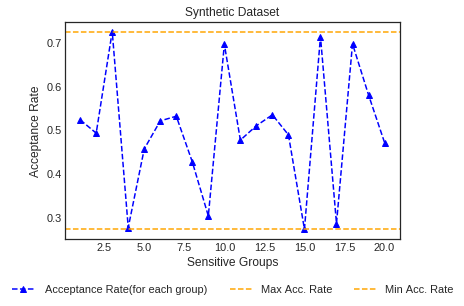

In [16]:
accp=[0.5229226361031518, 0.49236192714453586, 0.7256857855361596, 0.2756892230576441, 0.4561891515994437, 0.520523497917906, 0.5311953352769679, 0.42627737226277373, 0.3021885521885522, 0.6963696369636964, 0.47635135135135137, 0.5094026548672567, 0.5344311377245509, 0.4884526558891455, 0.27186147186147186, 0.7140562248995984, 0.2848378615249781, 0.6973788721207307, 0.5802098950524738, 0.4708597807270629]

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
np.set_printoptions(precision=4)  # For compact display.
plt.style.use('seaborn-white')


'''
y1=savgol_filter(a, 6, 2)
y2=savgol_filter(b, 6, 2)
y3=savgol_filter(c, 6, 2)
y4=savgol_filter(d, 6, 2)
y5=savgol_filter(e, 6, 2)
y6=savgol_filter(f, 6, 2)
y7=savgol_filter(g, 6, 2)
'''



fig = plt.figure()
ax = plt.subplot(111)
num=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

ax.plot(num,accp,label=' Acceptance Rate(for each group)',color='blue',marker='^',linestyle='--')
#ax.vlines(y=[.1992], ymin=[0], ymax=[1], colors='purple', linestyles='--', lw=2, label='PRedict avg. acc.')
#plt.axvline(.1992, color='green', linestyle='--')
plt.axhline(0.72568, color='orange', label='Max Acc. Rate',linestyle='--')
plt.axhline(0.2718, color='orange', label='Min Acc. Rate',linestyle='--')

   
plt.title('Synthetic Dataset')
ax.set_xlabel('Sensitive Groups')
ax.set_ylabel('Acceptance Rate') 
# ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 
fig.savefig('a2.png') 
